# Build quilt data package on the fly

`pip install quilt`

In [1]:
import quilt

pkg_name = 'iconix/deephypebot'

# start with an empty package -- revision1
#quilt.build(pkg_name)

In [2]:
import os
import pandas as pd

BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, '..', 'datasets')
reviews_f = 'reviews_and_metadata'

reviews_5yrs_f = os.path.join(DATA_DIR, f'{reviews_f}_5yrs.json')
reviews_5yrs_df = pd.read_json(reviews_5yrs_f)
print(f'num_reviews: {len(reviews_5yrs_df)}')
reviews_5yrs_df.head()

num_reviews: 25160


artist               artist_id  \
0  Mt. Joy  69tiO1fG8VWduDl3ji2qhI   
1  Mt. Joy  69tiO1fG8VWduDl3ji2qhI   
2  Mt. Joy  69tiO1fG8VWduDl3ji2qhI   
3  Mt. Joy  69tiO1fG8VWduDl3ji2qhI   
4     Opia  70zHrrrPfBkVV44AEhFyyh   

                                      audio_features        author  \
0  {'danceability': 0.486, 'energy': 0.638, 'key'...          None   
1  {'danceability': 0.486, 'energy': 0.638, 'key'...        Martin   
2  {'danceability': 0.486, 'energy': 0.638, 'key'...         Nasko   
3  {'danceability': 0.486, 'energy': 0.638, 'key'...         D & d   
4  {'danceability': 0.609, 'energy': 0.623, 'key'...  Nat Morawski   

                                             content  \
0  New Music\nMt. Joy reached out to us with the ...   
1  Folk rockers Mt. Joy have debuted their new so...   
2  You know we're digging Mt. Joy.\nTheir new sin...   
3  Nothing against the profession, but the U.S. h...   
4  Connecticut duo Opia have released a guitar he...   

             date_published  dek  \
0  2017-11-20T13:33:10.000Z  NaN   
1  2017-11-16T00:00:00.000Z  NaN   
2  2017-11-14T14:30:26.000Z  NaN   
3  2018-06-20T10:53:00.000Z  NaN   
4  2018-05-24T00:00:00.000Z  NaN   

                                                desc direction  \
0  “Silver Lining” is the fourth released single ...       ltr   
1  “Silver Lining” is the fourth released single ...       ltr   
2  “Silver Lining” is the fourth released single ...       ltr   
3  “Silver Lining” is the fourth released single ...       ltr   
4  \n\nI don’t know why but this feels like a bre...       ltr   

                        domain    ...      pages_rendered  \
0            www.buffablog.com    ...                 NaN   
1           www.discobelle.net    ...                 NaN   
2            www.stereofox.com    ...                 NaN   
3  indieobsessive.blogspot.com    ...                 NaN   
4                 acidstag.com    ...                 NaN   

                                       post_title  \
0                       Mt. Joy - "Silver Lining"   
1        Mt. Joy – Silver Lining | Discobelle.net   
2  Mt. Joy - Silver Lining | Stereofox Music Blog   
3      “Silver Lining” by Mt. Joy – A Song Review   
4                             Opia – ‘Four Winds’   

                                             posturl  rendered_pages  \
0     http://www.buffablog.com/mt-joy-silver-lining/             1.0   
1  http://www.discobelle.net/2017/11/16/mt-joy-si...             1.0   
2    https://www.stereofox.com/mt-joy-silver-lining/             1.0   
3  http://indieobsessive.blogspot.com/2017/11/sil...             1.0   
4      https://acidstag.com/2018/05/opia-four-winds/             1.0   

          sitename     song_title  \
0        buffaBLOG  Silver Lining   
1       Discobelle  Silver Lining   
2        Stereofox  Silver Lining   
3  Indie Obsessive  Silver Lining   
4        acid stag     Four Winds   

                                      spotify_genres              spotify_id  \
0  [deep new americana, folk-pop, indie pop, mode...  2fpDrL2Vpee0JnM6AoUFvl   
1  [deep new americana, folk-pop, indie pop, mode...  2fpDrL2Vpee0JnM6AoUFvl   
2  [deep new americana, folk-pop, indie pop, mode...  2fpDrL2Vpee0JnM6AoUFvl   
3  [deep new americana, folk-pop, indie pop, mode...  2fpDrL2Vpee0JnM6AoUFvl   
4                                       [vapor soul]  3NPiANHZYahLZhUT00GwTw   

  total_pages word_count  
0           1         86  
1           1         83  
2           1         75  
3           1        416  
4           1        148  

[5 rows x 32 columns]

In [3]:
# https://stackoverflow.com/a/38231651

# quilt cannot handle column 'audio_features' because it is a dict - convert it into multiple columns
# convert original 'audio_features' column from dict to JSON string
audio_df = reviews_5yrs_df['audio_features'].apply(pd.Series)[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']]
str_df = reviews_5yrs_df['audio_features'].astype('|S')
reviews_5yrs_df = pd.concat([reviews_5yrs_df.drop(['audio_features'], axis=1), str_df, audio_df], axis=1)
reviews_5yrs_df.columns

Index(['artist', 'artist_id', 'author', 'content', 'date_published', 'dek',
       'desc', 'direction', 'domain', 'error', 'excerpt', 'extract_url',
       'failed', 'genius_id', 'genres', 'itemid', 'lang', 'lead_image_url',
       'masked_content', 'messages', 'next_page_url', 'pages_rendered',
       'post_title', 'posturl', 'rendered_pages', 'sitename', 'song_title',
       'spotify_genres', 'spotify_id', 'total_pages', 'word_count',
       'audio_features', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [4]:
from quilt.data.iconix import deephypebot

# put data in it
deephypebot._set(['reviews_and_metadata_5yrs'], reviews_5yrs_df)
deephypebot.reviews_and_metadata_5yrs()

artist               artist_id  \
0                   Mt. Joy  69tiO1fG8VWduDl3ji2qhI   
1                   Mt. Joy  69tiO1fG8VWduDl3ji2qhI   
2                   Mt. Joy  69tiO1fG8VWduDl3ji2qhI   
3                   Mt. Joy  69tiO1fG8VWduDl3ji2qhI   
4                      Opia  70zHrrrPfBkVV44AEhFyyh   
5                      Opia  70zHrrrPfBkVV44AEhFyyh   
6                    ELOHIM  6wKxOKEA3K6R2UZ3COLXEY   
7                    ELOHIM  6wKxOKEA3K6R2UZ3COLXEY   
8                    ELOHIM  6wKxOKEA3K6R2UZ3COLXEY   
9                    ELOHIM  6wKxOKEA3K6R2UZ3COLXEY   
10                   ELOHIM  6wKxOKEA3K6R2UZ3COLXEY   
11                   ELOHIM  6wKxOKEA3K6R2UZ3COLXEY   
12                   G Flip  4SdIXLzfabqU61iK7SnKAU   
13                   G Flip  4SdIXLzfabqU61iK7SnKAU   
14                   G Flip  4SdIXLzfabqU61iK7SnKAU   
15                  Abalone  3vxlNs9NCsdlD8xlYIPOj3   
16                  Abalone  3vxlNs9NCsdlD8xlYIPOj3   
17                    Junip  7HcipAIJatVGT4U6HQrnFW   
18              Kevin Morby  6fxk3UXHTFYET8qCT9WlBF   
19              Kevin Morby  6fxk3UXHTFYET8qCT9WlBF   
20         Cosmo's Midnight  4VivsO1n4n2Mi2Btyb5gfL   
21         Cosmo's Midnight  4VivsO1n4n2Mi2Btyb5gfL   
22            Gilligan Moss  2fo0F81pRzdXjmWP6MkQqB   
23                  Teleman  3wrtQM9ICPPeHwoc1GWiyV   
24     RÜFÜS / RÜFÜS DU SOL  5Pb27ujIyYb33zBqVysBkj   
25     RÜFÜS / RÜFÜS DU SOL  5Pb27ujIyYb33zBqVysBkj   
26             Ben-Browning  497VSHqaZA32b7tgCETFEH   
27             Ben-Browning  497VSHqaZA32b7tgCETFEH   
28             Ben-Browning  497VSHqaZA32b7tgCETFEH   
29             Ben-Browning  497VSHqaZA32b7tgCETFEH   
...                     ...                     ...   
25130            Disclosure  6nS5roXSAGhTGr34W6n7Et   
25131            Disclosure  6nS5roXSAGhTGr34W6n7Et   
25132           ScHoolboy Q  5IcR3N7QB1j6KBL8eImZ8m   
25133           ScHoolboy Q  5IcR3N7QB1j6KBL8eImZ8m   
25134           ScHoolboy Q  5IcR3N7QB1j6KBL8eImZ8m   
25135     Empire Of The Sun  67hb7towEyKvt5Z8Bx306c   
25136           //Fractures  7sjRnhONmeFL1tmlUvdq70   
25137          Still Parade  3CXevh2SLL5B4cuTedOkj5   
25138          Still Parade  3CXevh2SLL5B4cuTedOkj5   
25139          Still Parade  3CXevh2SLL5B4cuTedOkj5   
25140               J. Cole  6l3HvQ5sa6mXTsMTB19rO5   
25141               J. Cole  6l3HvQ5sa6mXTsMTB19rO5   
25142               J. Cole  6l3HvQ5sa6mXTsMTB19rO5   
25143               J. Cole  6l3HvQ5sa6mXTsMTB19rO5   
25144               J. Cole  6l3HvQ5sa6mXTsMTB19rO5   
25145               J. Cole  6l3HvQ5sa6mXTsMTB19rO5   
25146         Robert DeLong  42crL07E4WPfVovyUtMpvC   
25147         Robert DeLong  42crL07E4WPfVovyUtMpvC   
25148         Robert DeLong  42crL07E4WPfVovyUtMpvC   
25149         Robert DeLong  42crL07E4WPfVovyUtMpvC   
25150               f y f e  0HdNDZaNm7xLt18v9aWDfe   
25151               f y f e  0HdNDZaNm7xLt18v9aWDfe   
25152               f y f e  0HdNDZaNm7xLt18v9aWDfe   
25153             Sylvester  5TGTpu4g8siFOIctZuQO7y   
25154           Baby Alpaca  3UEWPRL5vRlNOP1zhRQf71   
25155           Baby Alpaca  3UEWPRL5vRlNOP1zhRQf71   
25156  Two Door Cinema Club  536BYVgOnRky0xjsPT96zl   
25157            Adrian Lux  5kp9Qhzri9LrDkzrtjt5Sh   
25158  T.I. feat. Lil Wayne  4OBJLual30L7gRl5UkeRcT   
25159            The Smiths  3yY2gUcIsjMr8hjo51PoJ8   

                                                  author  \
0                                                   None   
1                                                 Martin   
2                                                  Nasko   
3                                                  D & d   
4                                           Nat Morawski   
5                                            Adeel Amini   
6                                          Oblivious Pop   
7                                                   None   
8                                                   None   
9         

In [5]:
# revision2 - using https://github.com/iconix/openai/blob/0798aa240dd141cb3e66f54f5715dfc02caa3e22/datasets/reviews_and_metadata_5yrs.json
quilt.build(pkg_name, deephypebot)

In [6]:
# log in and push to the registry
quilt.login()
quilt.push(pkg_name, is_public=True)

Launching a web browser...
If that didn't work, please visit the following URL: https://pkg.quiltdata.com/login
Failed to launch the browser: Command '['xdg-open', 'https://pkg.quiltdata.com/login']' returned non-zero exit status 3.

Enter the code from the webpage: eyJjb2RlIjogImMwZGYxNzI5LWY4YzMtNDA0MS05YmNjLWEyZjkyZjZjNmU1NyIsICJpZCI6ICJkMzI3ZTdkYS1lZDFiLTRiMWMtYTFlMC1lM2ZkNzk4NDJlMzkifQ==
Fetching upload URLs from the registry...


  0%|          | 0.00/36.8M [00:00<?, ?B/s]

Uploading 1 fragments (36757347 bytes)...


100%|██████████| 36.8M/36.8M [00:03<00:00, 12.2MB/s]


Uploading package metadata...
Updating the 'latest' tag...
Push complete. iconix/deephypebot is live:
https://quiltdata.com/package/iconix/deephypebot


In [7]:
quilt.inspect(pkg_name)

/home/ubuntu/.local/share/QuiltCli/quilt_packages/pkgs/Quilt/iconix/deephypebot
└── reviews_and_metadata_5yrs: shape (25160, 45), types 'artist': object, 'artist_id': object, 'author': object, 'conte…


# Genre clustering

Spotify genres are amazingly specific, and the tail is long. Let's do some light clustering to help reduce the tail.

The working theory is that this will benefit downstream conditioning of text generation on genre.

In [1]:
import quilt
pkg_name = 'iconix/deephypebot'

quilt.install(pkg_name)

iconix/deephypebot already installed.
Overwrite? (y/n) y
Fragments already downloaded


In [2]:
from quilt.data.iconix import deephypebot

reviews_5yrs_df = deephypebot.reviews_and_metadata_5yrs()
reviews_5yrs_df.sample(frac=1).head()

artist               artist_id                author  \
18871       WILDES  0ypTT9UqAU5sZpPo5JZmjR                  None   
1688          Kllo  0RDC2Krd2nmqseGx5C8PQz                  None   
6912   Super Duper  5zFMLXUnqxwdgTpLCX9LDj                  None   
4287         VILDE  41EzImgqZFKQDb60paN8io  Wording by Matthew P   
9069   Owen Rabbit  7cYskT4KsnVPdwMdjNIUnj  Wording by Matthew P   

                                                 content  \
18871  15 MAR 2016\n"Bare" is a song by the London ba...   
1688   While Kllo may not be the most memorable nor r...   
6912   Song: Angela\nArtist: Super Duper\nNashvillian...   
4287   New music. It comes in great waves. When the t...   
9069   Showing an incredible diversity in his sound, ...   

                 date_published  dek  \
18871  2016-03-15T00:00:00.000Z  NaN   
1688   2017-10-03T12:33:48.000Z  NaN   
6912   2015-05-05T11:10:58.000Z  NaN   
4287   2018-06-20T23:28:00.000Z  NaN   
9069   2018-06-20T21:53:00.000Z  NaN   

                                                    desc direction  \
18871                                          \n\n?\n\n       ltr   
1688                                           \n\n?\n\n       ltr   
6912                                           \n\n?\n\n       ltr   
4287   \n\nThe origin and idea for this song comes fr...       ltr   
9069                                           \n\n?\n\n       ltr   

                       domain  error       ...       loudness mode  \
18871           glamglare.com    NaN       ...        -10.385  0.0   
1688      dotsanddashes.co.uk    NaN       ...         -7.981  1.0   
6912   www.audio-aquarium.com    NaN       ...         -7.081  1.0   
4287      www.sos-music.co.uk    NaN       ...         -4.719  0.0   
9069      www.sos-music.co.uk    NaN       ...         -5.778  1.0   

       speechiness  acousticness instrumentalness liveness valence    tempo  \
18871       0.0270       0.78300         0.005140   0.0898  0.1450  129.876   
1688        0.0591       0.24500         0.519000   0.0971  0.4280  125.040   
6912        0.0293       0.00173         0.275000   0.3760  0.0931   88.984   
4287        0.0433       0.24400         0.344000   0.1000  0.5450  169.998   
9069        0.1470       0.03400         0.000017   0.6910  0.1600   70.018   

      duration_ms  time_signature  
18871    242060.0             4.0  
1688     224109.0             4.0  
6912     175281.0             4.0  
4287     248824.0             4.0  
9069     201560.0             4.0  

[5 rows x 45 columns]

In [3]:
from collections import Counter

c1 = Counter([g for gg in reviews_5yrs_df.spotify_genres for g in gg])
len(c1), c1.most_common()

(498,
 [('vapor soul', 4344),
  ('indie poptimism', 3886),
  ('pop', 3628),
  ('indietronica', 3462),
  ('electropop', 3406),
  ('indie r&b', 3242),
  ('tropical house', 2359),
  ('modern rock', 2171),
  ('indie psych-rock', 1942),
  ('indie pop', 1845),
  ('shimmer pop', 1827),
  ('edm', 1826),
  ('chillwave', 1705),
  ('indie electro-pop', 1451),
  ('rap', 1427),
  ('alternative dance', 1418),
  ('metropopolis', 1303),
  ('hip hop', 1212),
  ('pop rap', 1174),
  ('nu disco', 1086),
  ('dance pop', 1054),
  ('chamber pop', 996),
  ('aussietronica', 973),
  ('art pop', 973),
  ('vapor twitch', 915),
  ('new rave', 907),
  ('indie folk', 886),
  ('indie rock', 885),
  ('house', 867),
  ('vapor pop', 808),
  ('electro house', 752),
  ('indie anthem-folk', 649),
  ('gauze pop', 647),
  ('escape room', 641),
  ('post-teen pop', 606),
  ('folk-pop', 586),
  ('deep australian indie', 572),
  ('electronic trap', 570),
  ('southern hip hop', 544),
  ('trap music', 544),
  ('neo-psychedelic', 5

Let's see how many songs don't belong to a genre with at least **90** samples...

In [4]:
freq_threshold = 90

freq_genres = Counter({k:v for (k,v) in c1.items() if v >= freq_threshold})
len(freq_genres), freq_genres.most_common()

(127,
 [('vapor soul', 4344),
  ('indie poptimism', 3886),
  ('pop', 3628),
  ('indietronica', 3462),
  ('electropop', 3406),
  ('indie r&b', 3242),
  ('tropical house', 2359),
  ('modern rock', 2171),
  ('indie psych-rock', 1942),
  ('indie pop', 1845),
  ('shimmer pop', 1827),
  ('edm', 1826),
  ('chillwave', 1705),
  ('indie electro-pop', 1451),
  ('rap', 1427),
  ('alternative dance', 1418),
  ('metropopolis', 1303),
  ('hip hop', 1212),
  ('pop rap', 1174),
  ('nu disco', 1086),
  ('dance pop', 1054),
  ('chamber pop', 996),
  ('aussietronica', 973),
  ('art pop', 973),
  ('vapor twitch', 915),
  ('new rave', 907),
  ('indie folk', 886),
  ('indie rock', 885),
  ('house', 867),
  ('vapor pop', 808),
  ('electro house', 752),
  ('indie anthem-folk', 649),
  ('gauze pop', 647),
  ('escape room', 641),
  ('post-teen pop', 606),
  ('folk-pop', 586),
  ('deep australian indie', 572),
  ('electronic trap', 570),
  ('southern hip hop', 544),
  ('trap music', 544),
  ('neo-psychedelic', 5

In [5]:
# scratchpad
reviews_5yrs_df.spotify_genres[0]

array(['deep new americana', 'folk-pop', 'indie pop', 'modern rock',
       'new americana', 'stomp and holler'], dtype=object)

In [6]:
import numpy as np
import pandas as pd

# scratchpad
pd.Series(reviews_5yrs_df.spotify_genres[0]).isin(np.array(list(freq_genres.keys()))).any()

True

In [7]:
genre_present = reviews_5yrs_df.apply(lambda x: pd.Series(x.spotify_genres).isin(np.array(list(freq_genres.keys()))).any(), axis=1)
genre_present.value_counts()

True     19313
False     5847
dtype: int64

So **5,847** reviews don't fit into the **127** most-frequent genres.

Let's see if we can cluster these with less-specific genre tags.

## Add 1gram genre to genreless samples

If the 1gram genre is a top genre already, we should also gather samples into that existing genre (e.g. 'minimal tech house' -> 'house').

We'll accomplish this by adding the 1gram to the sample's genre list.

In [8]:
def add1Grams(genres):
    return np.array(list(set(np.append(genres, [word for genre in genres for word in genre.split()]))))

reviews_5yrs_df.loc[genre_present == False, 'spotify_genres'] = reviews_5yrs_df.loc[genre_present == False, 'spotify_genres'].apply(add1Grams)
reviews_5yrs_df.loc[genre_present == False].spotify_genres

15                                                     []
16                                                     []
22                                                     []
47                                                     []
48                                                     []
49                                                     []
50                                                     []
51                                                     []
52                                                     []
53                                                     []
64                                                     []
65                                                     []
68                                                     []
69                                                     []
70                                                     []
78                                                     []
79                                                     []
80            

Recalculate `freq_genres` ...

In [9]:
c1 = Counter([g for gg in reviews_5yrs_df.spotify_genres for g in gg])
freq_genres = Counter({k:v for (k,v) in c1.items() if v >= freq_threshold})
len(freq_genres), freq_genres.most_common()

(130,
 [('vapor soul', 4344),
  ('indie poptimism', 3886),
  ('pop', 3799),
  ('indietronica', 3462),
  ('electropop', 3406),
  ('indie r&b', 3242),
  ('tropical house', 2359),
  ('modern rock', 2171),
  ('indie psych-rock', 1942),
  ('indie pop', 1845),
  ('shimmer pop', 1827),
  ('edm', 1826),
  ('chillwave', 1705),
  ('rap', 1452),
  ('indie electro-pop', 1451),
  ('alternative dance', 1418),
  ('metropopolis', 1303),
  ('hip hop', 1212),
  ('pop rap', 1174),
  ('nu disco', 1086),
  ('dance pop', 1054),
  ('chamber pop', 996),
  ('aussietronica', 973),
  ('art pop', 973),
  ('house', 917),
  ('vapor twitch', 915),
  ('new rave', 907),
  ('indie folk', 886),
  ('indie rock', 885),
  ('vapor pop', 808),
  ('electro house', 752),
  ('indie anthem-folk', 649),
  ('gauze pop', 647),
  ('escape room', 641),
  ('post-teen pop', 606),
  ('folk-pop', 586),
  ('deep australian indie', 572),
  ('electronic trap', 570),
  ('southern hip hop', 544),
  ('trap music', 544),
  ('neo-psychedelic', 5

Visual [diff](https://www.diffchecker.com) of `freq_genres`, before and after adding 1grams ... `indie`, `rock`, and `trance` are new entrants, and genres like `pop`, `rap`, `house`, and `lo-fi` receive decent gains.

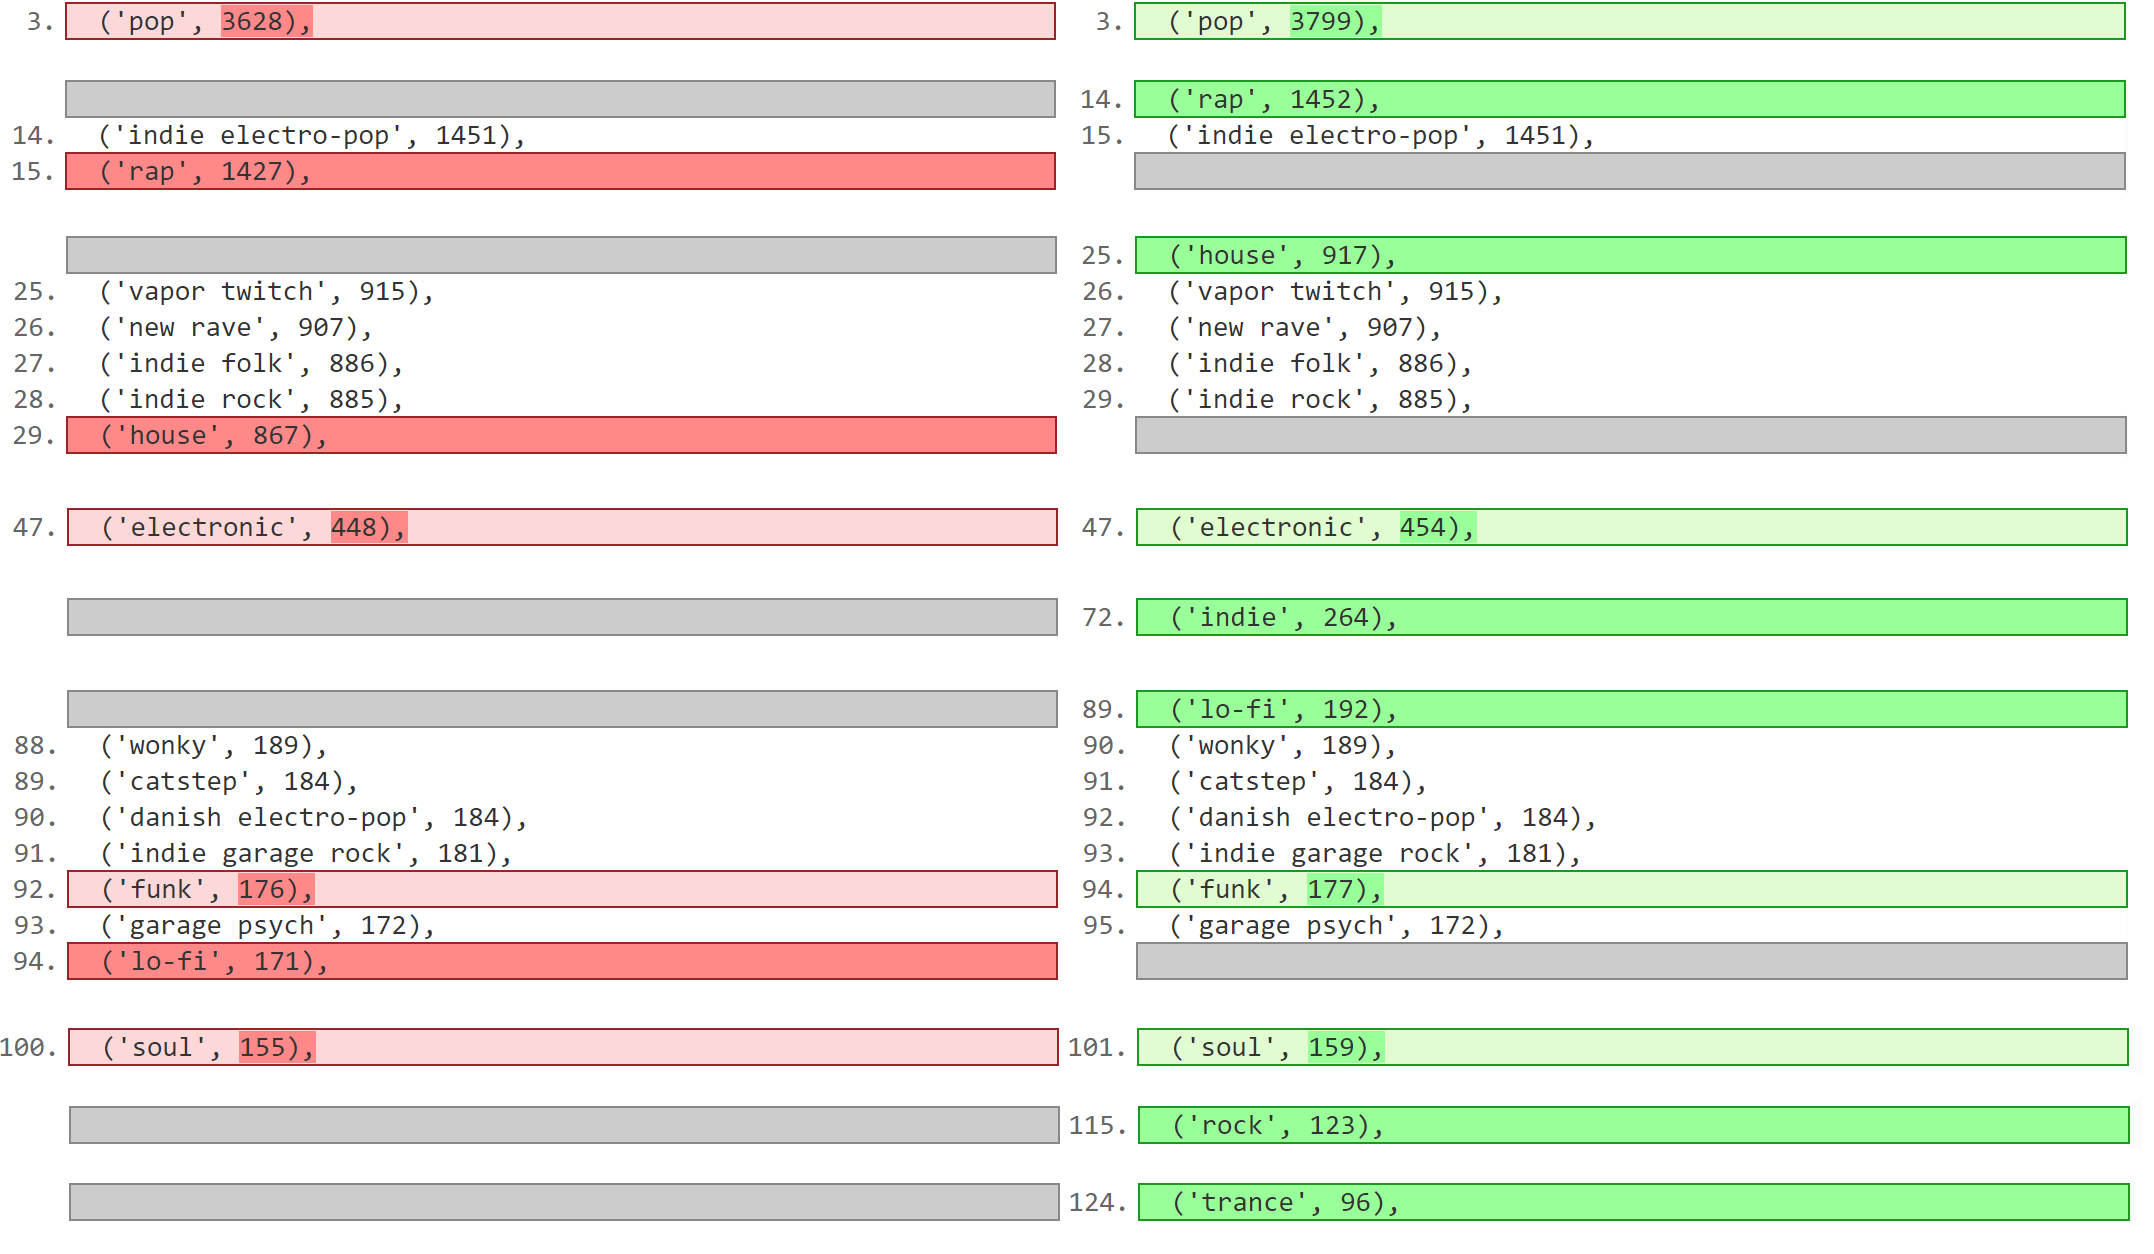

In [10]:
genre_present = reviews_5yrs_df.apply(lambda x: pd.Series(x.spotify_genres).isin(np.array(list(freq_genres.keys()))).any(), axis=1)
genre_present.value_counts()

True     19871
False     5289
dtype: int64

Recovered **558** samples doing this.

In [11]:
genreless_df = reviews_5yrs_df.loc[genre_present == False]
genreless_df.spotify_genres.value_counts()

/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/algorithms.py:761: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  keys, counts = f(values, dropna)


[vogue]                            15
[neo-singer-songwriter]            15
[fake]                             12
[electrofox]                       12
[filthstep]                        11
[dreamo]                           10
[mashup]                            6
[covertrance]                       6
[chillhop]                          6
[tracestep]                         4
[j-rap]                             3
[disco]                             3
[indiecoustica]                     2
[]                                  1
[]                                  1
[]                                  1
[]                                  1
[]                                  1
[]                                  1
[]                                  1
[]                                  1
[]                                  1
[]                                  1
[]                                  1
[]                                  1
[]                                  1
[]          

A lot of genre lists are actually **empty** (_duh, forgot that was possible_)!

In [12]:
flat_genreless = [genre for ndarray in list(genreless_df.spotify_genres) for genre in list(ndarray)]
c2 = Counter(flat_genreless)
len(c2), c2.most_common()

(151,
 [('hop', 27),
  ('canadian', 18),
  ('hip', 18),
  ('jazz', 16),
  ('tunes', 15),
  ('movie', 15),
  ('movie tunes', 15),
  ('neo-singer-songwriter', 15),
  ('vogue', 15),
  ('deep', 14),
  ('canadian folk', 13),
  ('folk', 13),
  ('classical', 12),
  ('fake', 12),
  ('electrofox', 12),
  ('band', 11),
  ('filthstep', 11),
  ('dreamo', 10),
  ('era', 10),
  ('roots reggae', 10),
  ('roots', 10),
  ('reggae', 10),
  ('vocal jazz', 9),
  ('vocal', 9),
  ('glitch hop', 9),
  ('glitch', 9),
  ('new', 8),
  ('disco', 8),
  ('destroy techno', 7),
  ('techno', 7),
  ('destroy', 7),
  ('wind', 7),
  ('marching', 7),
  ('wind ensemble', 7),
  ('concert band', 7),
  ('marching band', 7),
  ('concert', 7),
  ('ensemble', 7),
  ('norwegian jazz', 6),
  ('norwegian', 6),
  ('chillhop', 6),
  ('mashup', 6),
  ('covertrance', 6),
  ('deep new americana', 5),
  ('americana', 5),
  ('big', 5),
  ('minimal', 5),
  ('minimal wave', 5),
  ('wave', 5),
  ('grave', 5),
  ('grave wave', 5),
  ('brazil

No other 1gram genres come close to 90 samples.

## Add significant n-gram genres to still-genreless samples

In [13]:
genreless_df.loc[genreless_df.apply(lambda x: pd.Series(x.spotify_genres).isin(['canadian']).any(), axis=1) == True, 'spotify_genres']

119      [canadian indigenous, indigenous, canadian]
7102                 [canadian folk, canadian, folk]
7103                 [canadian folk, canadian, folk]
7104                 [canadian folk, canadian, folk]
7105                 [canadian folk, canadian, folk]
9055                 [canadian folk, canadian, folk]
9056                 [canadian folk, canadian, folk]
9057                 [canadian folk, canadian, folk]
9058                 [canadian folk, canadian, folk]
16398                [canadian folk, canadian, folk]
16510         [canadian hip hop, hip, canadian, hop]
16511         [canadian hip hop, hip, canadian, hop]
16512         [canadian hip hop, hip, canadian, hop]
16513         [canadian hip hop, hip, canadian, hop]
19553                [canadian folk, canadian, folk]
19554                [canadian folk, canadian, folk]
19555                [canadian folk, canadian, folk]
19556                [canadian folk, canadian, folk]
Name: spotify_genres, dtype: object

Let's special case the 2-gram 'hip hop'

In [14]:
freq_genres.get('hip hop')

1212

In [15]:
def addHipHop(genres):
    if 'hip' in genres and 'hop' in genres:
        return np.array(np.append(genres, ['hip hop']))
    return genres

reviews_5yrs_df.loc[genre_present == False, 'spotify_genres'] = reviews_5yrs_df.loc[genre_present == False, 'spotify_genres'].apply(addHipHop)
reviews_5yrs_df.loc[genre_present == False].spotify_genres

/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


15                                                     []
16                                                     []
22                                                     []
47                                                     []
48                                                     []
49                                                     []
50                                                     []
51                                                     []
52                                                     []
53                                                     []
64                                                     []
65                                                     []
68                                                     []
69                                                     []
70                                                     []
78                                                     []
79                                                     []
80            

In [16]:
c1 = Counter([g for gg in reviews_5yrs_df.spotify_genres for g in gg])
freq_genres = Counter({k:v for (k,v) in c1.items() if v >= freq_threshold})
freq_genres.most_common()

[('vapor soul', 4344),
 ('indie poptimism', 3886),
 ('pop', 3799),
 ('indietronica', 3462),
 ('electropop', 3406),
 ('indie r&b', 3242),
 ('tropical house', 2359),
 ('modern rock', 2171),
 ('indie psych-rock', 1942),
 ('indie pop', 1845),
 ('shimmer pop', 1827),
 ('edm', 1826),
 ('chillwave', 1705),
 ('rap', 1452),
 ('indie electro-pop', 1451),
 ('alternative dance', 1418),
 ('metropopolis', 1303),
 ('hip hop', 1230),
 ('pop rap', 1174),
 ('nu disco', 1086),
 ('dance pop', 1054),
 ('chamber pop', 996),
 ('aussietronica', 973),
 ('art pop', 973),
 ('house', 917),
 ('vapor twitch', 915),
 ('new rave', 907),
 ('indie folk', 886),
 ('indie rock', 885),
 ('vapor pop', 808),
 ('electro house', 752),
 ('indie anthem-folk', 649),
 ('gauze pop', 647),
 ('escape room', 641),
 ('post-teen pop', 606),
 ('folk-pop', 586),
 ('deep australian indie', 572),
 ('electronic trap', 570),
 ('southern hip hop', 544),
 ('trap music', 544),
 ('neo-psychedelic', 503),
 ('big room', 498),
 ('underground hip hop

`('hip hop', 1212)` => `('hip hop', 1230)`

In [17]:
genre_present = reviews_5yrs_df.apply(lambda x: pd.Series(x.spotify_genres).isin(np.array(list(freq_genres.keys()))).any(), axis=1)
genre_present.value_counts()

True     19889
False     5271
dtype: int64

**18** more samples recovered with generic genre `hip hop`.

## Remove samples that still don't have a top genre

Remove the remaining genreless samples (including empty ones that Spotify didn't have genre info for).

In [18]:
genreless_df = reviews_5yrs_df.loc[genre_present == False]

final_genreless = [genre for ndarray in list(genreless_df.spotify_genres) for genre in list(ndarray)]
c3 = Counter(final_genreless)
len(c3), c3.most_common()

(135,
 [('jazz', 16),
  ('tunes', 15),
  ('movie', 15),
  ('movie tunes', 15),
  ('neo-singer-songwriter', 15),
  ('vogue', 15),
  ('canadian', 14),
  ('canadian folk', 13),
  ('folk', 13),
  ('deep', 12),
  ('classical', 12),
  ('fake', 12),
  ('electrofox', 12),
  ('band', 11),
  ('filthstep', 11),
  ('dreamo', 10),
  ('era', 10),
  ('roots reggae', 10),
  ('roots', 10),
  ('reggae', 10),
  ('vocal jazz', 9),
  ('vocal', 9),
  ('glitch hop', 9),
  ('glitch', 9),
  ('hop', 9),
  ('new', 8),
  ('disco', 8),
  ('destroy techno', 7),
  ('techno', 7),
  ('destroy', 7),
  ('wind', 7),
  ('marching', 7),
  ('wind ensemble', 7),
  ('concert band', 7),
  ('marching band', 7),
  ('concert', 7),
  ('ensemble', 7),
  ('norwegian jazz', 6),
  ('norwegian', 6),
  ('chillhop', 6),
  ('mashup', 6),
  ('covertrance', 6),
  ('deep new americana', 5),
  ('americana', 5),
  ('big', 5),
  ('minimal', 5),
  ('minimal wave', 5),
  ('wave', 5),
  ('grave', 5),
  ('grave wave', 5),
  ('classical era', 5),
  

In [19]:
c1.get('jazz')

28

In [20]:
len(genreless_df.spotify_genres.loc[genreless_df.spotify_genres.apply(lambda x: len(x) == 0)])

5030

Removing **5030** empty-genre samples and **241** genreless samples.

In [21]:
reviews_5yrs_df = reviews_5yrs_df.drop(genreless_df.index)
reviews_5yrs_df.head()

artist               artist_id        author  \
0  Mt. Joy  69tiO1fG8VWduDl3ji2qhI          None   
1  Mt. Joy  69tiO1fG8VWduDl3ji2qhI        Martin   
2  Mt. Joy  69tiO1fG8VWduDl3ji2qhI         Nasko   
3  Mt. Joy  69tiO1fG8VWduDl3ji2qhI         D & d   
4     Opia  70zHrrrPfBkVV44AEhFyyh  Nat Morawski   

                                             content  \
0  New Music\nMt. Joy reached out to us with the ...   
1  Folk rockers Mt. Joy have debuted their new so...   
2  You know we're digging Mt. Joy.\nTheir new sin...   
3  Nothing against the profession, but the U.S. h...   
4  Connecticut duo Opia have released a guitar he...   

             date_published  dek  \
0  2017-11-20T13:33:10.000Z  NaN   
1  2017-11-16T00:00:00.000Z  NaN   
2  2017-11-14T14:30:26.000Z  NaN   
3  2018-06-20T10:53:00.000Z  NaN   
4  2018-05-24T00:00:00.000Z  NaN   

                                                desc direction  \
0  “Silver Lining” is the fourth released single ...       ltr   
1  “Silver Lining” is the fourth released single ...       ltr   
2  “Silver Lining” is the fourth released single ...       ltr   
3  “Silver Lining” is the fourth released single ...       ltr   
4  \n\nI don’t know why but this feels like a bre...       ltr   

                        domain  error       ...       loudness mode  \
0            www.buffablog.com    NaN       ...         -6.231  1.0   
1           www.discobelle.net    NaN       ...         -6.231  1.0   
2            www.stereofox.com    NaN       ...         -6.231  1.0   
3  indieobsessive.blogspot.com    NaN       ...         -6.231  1.0   
4                 acidstag.com    NaN       ...         -6.575  1.0   

   speechiness  acousticness instrumentalness liveness valence    tempo  \
0       0.0323      0.000921         0.000000   0.0780   0.178  144.458   
1       0.0323      0.000921         0.000000   0.0780   0.178  144.458   
2       0.0323      0.000921         0.000000   0.0780   0.178  144.458   
3       0.0323      0.000921         0.000000   0.0780   0.178  144.458   
4       0.1020      0.190000         0.000034   0.0625   0.582   87.974   

  duration_ms  time_signature  
0    199827.0             4.0  
1    199827.0             4.0  
2    199827.0             4.0  
3    199827.0             4.0  
4    223814.0             4.0  

[5 rows x 45 columns]

In [22]:
c1 = Counter([g for gg in reviews_5yrs_df.spotify_genres for g in gg])
freq_genres = Counter({k:v for (k,v) in c1.items() if v >= freq_threshold})
genre_present = reviews_5yrs_df.apply(lambda x: pd.Series(x.spotify_genres).isin(np.array(list(freq_genres.keys()))).any(), axis=1)
genre_present.value_counts()

True    19889
dtype: int64

In [23]:
list(zip(range(1, len(freq_genres) + 1), freq_genres.most_common()))

[(1, ('vapor soul', 4344)),
 (2, ('indie poptimism', 3886)),
 (3, ('pop', 3799)),
 (4, ('indietronica', 3462)),
 (5, ('electropop', 3406)),
 (6, ('indie r&b', 3242)),
 (7, ('tropical house', 2359)),
 (8, ('modern rock', 2171)),
 (9, ('indie psych-rock', 1942)),
 (10, ('indie pop', 1845)),
 (11, ('shimmer pop', 1827)),
 (12, ('edm', 1826)),
 (13, ('chillwave', 1705)),
 (14, ('rap', 1452)),
 (15, ('indie electro-pop', 1451)),
 (16, ('alternative dance', 1418)),
 (17, ('metropopolis', 1303)),
 (18, ('hip hop', 1230)),
 (19, ('pop rap', 1174)),
 (20, ('nu disco', 1086)),
 (21, ('dance pop', 1054)),
 (22, ('chamber pop', 996)),
 (23, ('aussietronica', 973)),
 (24, ('art pop', 973)),
 (25, ('house', 917)),
 (26, ('vapor twitch', 915)),
 (27, ('new rave', 907)),
 (28, ('indie folk', 886)),
 (29, ('indie rock', 885)),
 (30, ('vapor pop', 808)),
 (31, ('electro house', 752)),
 (32, ('indie anthem-folk', 649)),
 (33, ('gauze pop', 647)),
 (34, ('escape room', 641)),
 (35, ('post-teen pop', 606))

## Count frequent genres per sample
Since samples can have multiple genres, let's see how often this occurs with the 'top' genres.

First, let's remove all non-top genres.

In [24]:
# scratchpad
np.array(pd.Series(reviews_5yrs_df.spotify_genres[0])), np.array(pd.Series(reviews_5yrs_df.spotify_genres[0]).where(pd.Series(reviews_5yrs_df.spotify_genres[0]).isin(np.array(list(freq_genres.keys())))).dropna())

(array(['deep new americana', 'folk-pop', 'indie pop', 'modern rock',
        'new americana', 'stomp and holler'], dtype=object),
 array(['folk-pop', 'indie pop', 'modern rock', 'new americana',
        'stomp and holler'], dtype=object))

In [25]:
reviews_5yrs_df.spotify_genres = reviews_5yrs_df.apply(lambda x: np.array(pd.Series(x.spotify_genres).where(pd.Series(x.spotify_genres).isin(np.array(list(freq_genres.keys())))).dropna()), axis=1)

Now we can simply get genre counts per row in `spotify_genres`

In [26]:
num_genres_per = reviews_5yrs_df.spotify_genres.apply(len)
list(zip(range(1, len(num_genres_per.value_counts()) + 1), num_genres_per.value_counts(), num_genres_per.value_counts() / sum(num_genres_per.value_counts())))

[(1, 4479, 0.2251998592186636),
 (2, 2769, 0.13922268590678263),
 (3, 2629, 0.1321836190859269),
 (4, 2617, 0.13158027050128213),
 (5, 2199, 0.11056362813615567),
 (6, 1695, 0.08522298758107497),
 (7, 1139, 0.05726783649253356),
 (8, 849, 0.04268691236361808),
 (9, 457, 0.022977525265221982),
 (10, 331, 0.016642365126451807),
 (11, 187, 0.009402182110714466),
 (12, 174, 0.008748554477349289),
 (13, 128, 0.006435718236210971),
 (14, 80, 0.004022323897631856),
 (15, 45, 0.0022625571924179194),
 (16, 31, 0.0015586505103323445),
 (17, 27, 0.0013575343154507518),
 (18, 24, 0.001206697169289557),
 (19, 18, 0.0009050228769671677),
 (20, 10, 0.000502790487203982),
 (21, 1, 5.027904872039821e-05)]

In [27]:
reviews_5yrs_df.loc[reviews_5yrs_df.spotify_genres.apply(lambda x: len(x) == 21)][['artist', 'song_title', 'spotify_genres']]

artist                    song_title  \
1160  Destroyer  Tinseltown Swimming In Blood   

                                         spotify_genres  
1160  [alternative dance, alternative rock, art pop,...

In [28]:
list(reviews_5yrs_df.loc[reviews_5yrs_df.spotify_genres.apply(lambda x: len(x) == 21), 'spotify_genres'])

[array(['alternative dance', 'alternative rock', 'art pop', 'chamber pop',
        'chamber psych', 'chillwave', 'dream pop', 'folk-pop',
        'freak folk', 'garage psych', 'indie folk', 'indie pop',
        'indie rock', 'indietronica', 'lo-fi', 'modern rock',
        'neo-psychedelic', 'noise pop', 'nu gaze', 'preverb',
        'stomp and holler'], dtype=object)]

Might try capping # of frequent genres per sample at **top 10** when conditioning.

In [29]:
cap = 10

sum(num_genres_per.value_counts()[:cap] / sum(num_genres_per.value_counts()))

0.9635476896777114

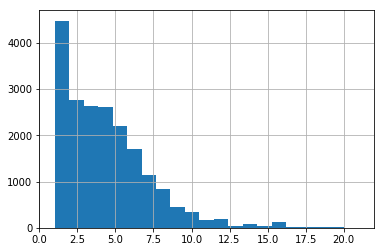

In [30]:
% matplotlib inline

num_genres_per.hist(bins=len(num_genres_per.value_counts()))

In [31]:
'unique combinations of genres:', len(Counter([tuple(set(ndarray)) for ndarray in reviews_5yrs_df.spotify_genres]))

('unique combinations of genres:', 1135)

## New quilt revision (3)

In [32]:
deephypebot._set(['reviews_and_metadata_5yrs'], reviews_5yrs_df)
deephypebot.reviews_and_metadata_5yrs()

artist               artist_id  \
0                   Mt. Joy  69tiO1fG8VWduDl3ji2qhI   
1                   Mt. Joy  69tiO1fG8VWduDl3ji2qhI   
2                   Mt. Joy  69tiO1fG8VWduDl3ji2qhI   
3                   Mt. Joy  69tiO1fG8VWduDl3ji2qhI   
4                      Opia  70zHrrrPfBkVV44AEhFyyh   
5                      Opia  70zHrrrPfBkVV44AEhFyyh   
6                    ELOHIM  6wKxOKEA3K6R2UZ3COLXEY   
7                    ELOHIM  6wKxOKEA3K6R2UZ3COLXEY   
8                    ELOHIM  6wKxOKEA3K6R2UZ3COLXEY   
9                    ELOHIM  6wKxOKEA3K6R2UZ3COLXEY   
10                   ELOHIM  6wKxOKEA3K6R2UZ3COLXEY   
11                   ELOHIM  6wKxOKEA3K6R2UZ3COLXEY   
12                   G Flip  4SdIXLzfabqU61iK7SnKAU   
13                   G Flip  4SdIXLzfabqU61iK7SnKAU   
14                   G Flip  4SdIXLzfabqU61iK7SnKAU   
17                    Junip  7HcipAIJatVGT4U6HQrnFW   
18              Kevin Morby  6fxk3UXHTFYET8qCT9WlBF   
19              Kevin Morby  6fxk3UXHTFYET8qCT9WlBF   
20         Cosmo's Midnight  4VivsO1n4n2Mi2Btyb5gfL   
21         Cosmo's Midnight  4VivsO1n4n2Mi2Btyb5gfL   
23                  Teleman  3wrtQM9ICPPeHwoc1GWiyV   
24     RÜFÜS / RÜFÜS DU SOL  5Pb27ujIyYb33zBqVysBkj   
25     RÜFÜS / RÜFÜS DU SOL  5Pb27ujIyYb33zBqVysBkj   
26             Ben-Browning  497VSHqaZA32b7tgCETFEH   
27             Ben-Browning  497VSHqaZA32b7tgCETFEH   
28             Ben-Browning  497VSHqaZA32b7tgCETFEH   
29             Ben-Browning  497VSHqaZA32b7tgCETFEH   
30             Ben-Browning  497VSHqaZA32b7tgCETFEH   
31             Ben-Browning  497VSHqaZA32b7tgCETFEH   
32              SOFI TUKKER  586uxXMyD5ObPuzjtrzO1Q   
...                     ...                     ...   
25126               Mt Eden  3YAy9OUnnRsk2JLTaOLcw2   
25127         The Colourist  0hK26QoGcuKV3lH0x9MvUU   
25128         The Colourist  0hK26QoGcuKV3lH0x9MvUU   
25129         The Colourist  0hK26QoGcuKV3lH0x9MvUU   
25130            Disclosure  6nS5roXSAGhTGr34W6n7Et   
25131            Disclosure  6nS5roXSAGhTGr34W6n7Et   
25132           ScHoolboy Q  5IcR3N7QB1j6KBL8eImZ8m   
25133           ScHoolboy Q  5IcR3N7QB1j6KBL8eImZ8m   
25134           ScHoolboy Q  5IcR3N7QB1j6KBL8eImZ8m   
25135     Empire Of The Sun  67hb7towEyKvt5Z8Bx306c   
25136           //Fractures  7sjRnhONmeFL1tmlUvdq70   
25137          Still Parade  3CXevh2SLL5B4cuTedOkj5   
25138          Still Parade  3CXevh2SLL5B4cuTedOkj5   
25139          Still Parade  3CXevh2SLL5B4cuTedOkj5   
25140               J. Cole  6l3HvQ5sa6mXTsMTB19rO5   
25141               J. Cole  6l3HvQ5sa6mXTsMTB19rO5   
25142               J. Cole  6l3HvQ5sa6mXTsMTB19rO5   
25143               J. Cole  6l3HvQ5sa6mXTsMTB19rO5   
25144               J. Cole  6l3HvQ5sa6mXTsMTB19rO5   
25145               J. Cole  6l3HvQ5sa6mXTsMTB19rO5   
25146         Robert DeLong  42crL07E4WPfVovyUtMpvC   
25147         Robert DeLong  42crL07E4WPfVovyUtMpvC   
25148         Robert DeLong  42crL07E4WPfVovyUtMpvC   
25149         Robert DeLong  42crL07E4WPfVovyUtMpvC   
25154           Baby Alpaca  3UEWPRL5vRlNOP1zhRQf71   
25155           Baby Alpaca  3UEWPRL5vRlNOP1zhRQf71   
25156  Two Door Cinema Club  536BYVgOnRky0xjsPT96zl   
25157            Adrian Lux  5kp9Qhzri9LrDkzrtjt5Sh   
25158  T.I. feat. Lil Wayne  4OBJLual30L7gRl5UkeRcT   
25159            The Smiths  3yY2gUcIsjMr8hjo51PoJ8   

                                                  author  \
0                                                   None   
1                                                 Martin   
2                                                  Nasko   
3                                                  D & d   
4                                           Nat Morawski   
5                                            Adeel Amini   
6                                          Oblivious Pop   
7                                                   None   
8                                                   None   
9         

In [33]:
deephypebot._meta['description'] = 'All reviews contain 1+ "top" genres'

In [34]:
quilt.build(pkg_name, deephypebot) # revision3
quilt.inspect(pkg_name)

/home/ubuntu/.local/share/QuiltCli/quilt_packages/pkgs/Quilt/iconix/deephypebot
└── reviews_and_metadata_5yrs: shape (19889, 45), types 'artist': object, 'artist_id': object, 'author': object, 'conte…


In [35]:
quilt.login()
quilt.push(pkg_name, is_public=True)

Launching a web browser...
If that didn't work, please visit the following URL: https://pkg.quiltdata.com/login
Failed to launch the browser: Command '['xdg-open', 'https://pkg.quiltdata.com/login']' returned non-zero exit status 3.

Enter the code from the webpage: eyJjb2RlIjogIjg3MTM3MzZkLTgwNDAtNGEyNi05OTUyLTc5MTRmYjg2NTNmOCIsICJpZCI6ICJkMzI3ZTdkYS1lZDFiLTRiMWMtYTFlMC1lM2ZkNzk4NDJlMzkifQ==
Fetching upload URLs from the registry...


  0%|          | 0.00/29.1M [00:00<?, ?B/s]

Uploading 2 fragments (29078344 bytes)...


100%|██████████| 29.1M/29.1M [00:03<00:00, 9.31MB/s]  


Uploading package metadata...
Updating the 'latest' tag...
Push complete. iconix/deephypebot is live:
https://quiltdata.com/package/iconix/deephypebot


## Genre wordcloud

In [1]:
import quilt
pkg_name = 'iconix/deephypebot'

quilt.install(pkg_name)

iconix/deephypebot already installed.
Overwrite? (y/n) y
Fragments already downloaded


In [2]:
from quilt.data.iconix import deephypebot

reviews_5yrs_df = deephypebot.reviews_and_metadata_5yrs()
reviews_5yrs_df.sample(frac=1).head()

artist               artist_id         author  \
10016  Atlas Genius  42vg2T0Xg9yPaAgogJzoQH          ITJYM   
14296       MEG MAC  4faUajx9k93O56nlmpkOuz           None   
16588         DYLYN  3hOdLrtKdSs3AEuwcR7ses  Laurence\nDay   
9729    Major Lazer  738wLrAtLtCtFOLvQBXOXp  theneedledrop   
4419    FUTURO PELO  5EqHv5lvGgrnkuGEFn67yN            Ivo   

                                                 content  \
10016  It's been an absolute age since we've heard an...   
14296  I posted Meg Mac a while back, and it was quit...   
16588  DYLYN deals in big statements: cascading beats...   
9729   July 22, 2015New MusictheneedledropComment\nMa...   
4419   Electronic\nIt's so difficult to describe Futu...   

                 date_published  dek  \
10016  2015-06-30T00:00:00.000Z  NaN   
14296                      None  NaN   
16588                      None  NaN   
9729                       None  NaN   
4419   2017-02-23T14:09:18.000Z  NaN   

                                                    desc direction  \
10016  \n\n“Molecules” is the lead single from Atlas ...       ltr   
14296                                          \n\n?\n\n       ltr   
16588                                          \n\n?\n\n       ltr   
9729   \n\nMajor Lazer strikes back with “Lost,” a Re...       ltr   
4419                                                \n\n       ltr   

                         domain  error       ...       loudness mode  \
10016  inthejunkyardmusic.co.uk    NaN       ...         -4.822  0.0   
14296       musicthatwelike.com    NaN       ...         -8.176  0.0   
16588                      None    NaN       ...         -3.677  0.0   
9729      www.theneedledrop.com    NaN       ...         -5.061  1.0   
4419          www.stereofox.com    NaN       ...         -7.852  0.0   

       speechiness  acousticness instrumentalness liveness valence    tempo  \
10016       0.0440      0.000442         0.000010   0.1950   0.513  117.028   
14296       0.0483      0.079600         0.000023   0.0414   0.371   80.118   
16588       0.0452      0.054500         0.000007   0.0766   0.905  154.964   
9729        0.0286      0.005600         0.002120   0.0875   0.847  139.928   
4419        0.0560      0.020700         0.137000   0.0984   0.860  142.057   

      duration_ms  time_signature  
10016    249267.0             4.0  
14296    193405.0             4.0  
16588    187320.0             4.0  
9729     195649.0             4.0  
4419     170704.0             4.0  

[5 rows x 45 columns]

In [3]:
from collections import Counter

freq_threshold = 90

c1 = Counter([g for gg in reviews_5yrs_df.spotify_genres for g in gg])
freq_genres = Counter({k:v for (k,v) in c1.items() if v >= freq_threshold})

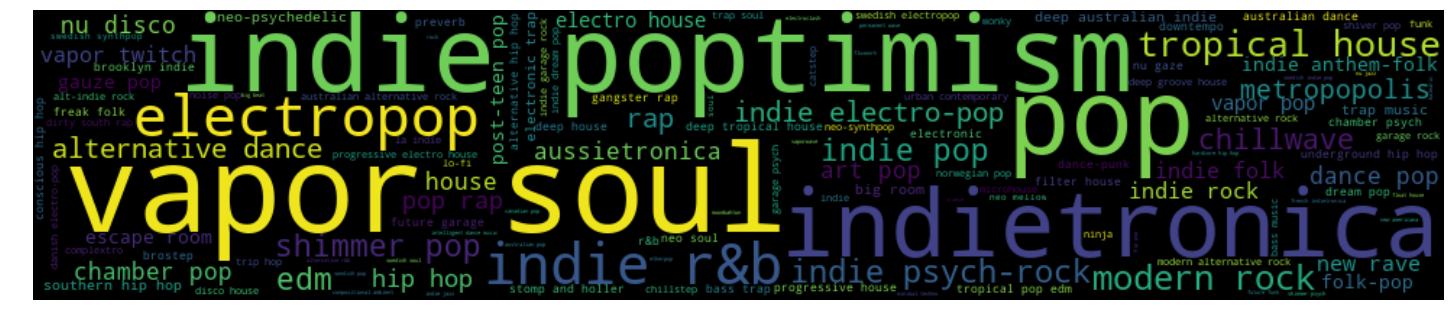

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline

wordcloud = WordCloud(width=975).generate_from_frequencies(dict(freq_genres))

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('genrecloud.png', bbox_inches='tight', facecolor='k')

# Split content into sentences
For VAE training

In [1]:
from quilt.data.iconix import deephypebot
import spacy

import time
start = time.time()

nlp = spacy.load('en')

df = deephypebot.reviews_and_metadata_5yrs()
df = df.assign(content_sentences=lambda x: [[' '.join(s.text.split()) for s in ss] for ss in [list(nlp(c).sents) for c in x.masked_content]])
    
print(f'Runtime: {time.time() - start:.2f}s')

df.content_sentences.head()

Runtime: 571.64s


0    [New Music <artist> reached out to us with the...
1    [Folk rockers <artist> have debuted their new ...
2    [You know we're digging <, artist>., Their new...
3    [Nothing against the profession, but the U.S. ...
4    [Connecticut duo <artist> have released a guit...
Name: content_sentences, dtype: object

## New quilt revision (4)

In [2]:
import quilt
pkg_name = 'iconix/deephypebot'

deephypebot._set(['reviews_and_metadata_5yrs'], df)
deephypebot.reviews_and_metadata_5yrs().content_sentences.head()

0    [New Music <artist> reached out to us with the...
1    [Folk rockers <artist> have debuted their new ...
2    [You know we're digging <, artist>., Their new...
3    [Nothing against the profession, but the U.S. ...
4    [Connecticut duo <artist> have released a guit...
Name: content_sentences, dtype: object

In [3]:
deephypebot._meta['description'] = 'Split content into sentences'

In [4]:
quilt.build(pkg_name, deephypebot) # revision4
quilt.inspect(pkg_name)

/home/ubuntu/.local/share/QuiltCli/quilt_packages/pkgs/Quilt/iconix/deephypebot
└── reviews_and_metadata_5yrs: shape (19889, 46), types 'artist': object, 'artist_id': object, 'author': object, 'conte…


In [5]:
quilt.login()
quilt.push(pkg_name, is_public=True)

Launching a web browser...
If that didn't work, please visit the following URL: https://pkg.quiltdata.com/login
Failed to launch the browser: Command '['xdg-open', 'https://pkg.quiltdata.com/login']' returned non-zero exit status 3.

Enter the code from the webpage: eyJjb2RlIjogIjBhMmM2N2RhLTgwN2UtNDE3MC04YTUyLTFmYWZiZjljNzBiYyIsICJpZCI6ICJkMzI3ZTdkYS1lZDFiLTRiMWMtYTFlMC1lM2ZkNzk4NDJlMzkifQ==
Fetching upload URLs from the registry...


  0%|          | 0.00/40.1M [00:00<?, ?B/s]

Uploading 2 fragments (40111029 bytes)...


100%|██████████| 40.1M/40.1M [00:03<00:00, 12.6MB/s]  


Uploading package metadata...
Updating the 'latest' tag...
Push complete. iconix/deephypebot is live:
https://quiltdata.com/package/iconix/deephypebot


In [ ]:
#df.to_json('../datasets/reviews_and_metadata_5yrs.json', orient='records')

# Removing tour date lists

## New quilt revision (5)

Based on topic model explorations below, tour dates frequently muddy the dataset and don't represent legit sentences - so let's remove the worst offenders.

Basically, when `n_topics=4`, one topic cluster neatly gathers a bunch of crud, above a certain probability level.

Quickly duplicating topic modeling code from below:

In [1]:
from pytorchtextvae import datasets
import torch

# pip install git+https://github.com/iconix/pytorch-text-vae.git
from pytorchtextvae import generate

DEVICE = torch.device('cpu') # CPU inference
vae, input_side, output_side, pairs, dataset, EMBED_SIZE, random_state = generate.load_model('../../pytorch-text-vae/model/best/reviews_and_metadata_5yrs_state.pt', 'reviews_and_metadata_5yrs_stored_info.pkl', DEVICE, cache_path='../../pytorch-text-vae/model/best/tmp')

def tokenize(line):
    l = line.strip().lstrip().rstrip()
    l = datasets.normalize_string(l)
    return l.split(' ')

sents = [pair[0] for pair in pairs]
texts = [tokenize(sentence) for sentence in sents]

from nltk.corpus import stopwords

# remove stop words and words that appear only once
stoplist = [datasets.normalize_string(word) for word in stopwords.words('english')]
fillerlist = ['author', 'song_title', 'artist', 'sitename']

texts = [[word for word in text if word not in stoplist and word not in fillerlist] for text in texts]

from gensim.corpora.dictionary import Dictionary
dictionary = Dictionary(texts)

from gensim.models.ldamodel import LdaModel

n_topics = 4
passes = 20 # number of passes through documents
iterations = 400
eval_every = 1  # Don't evaluate model perplexity, takes too much time.

corpus = [dictionary.doc2bow(text) for text in texts]
# Train the model on the corpus.
lda = LdaModel(corpus, id2word=dictionary, num_topics=n_topics, iterations=iterations, passes=passes, eval_every=eval_every)
#lda = LdaModel(corpus, id2word=dictionary, num_topics=n_topics)
lda.print_topics(n_topics)

Fetching cached info at ../../pytorch-text-vae/model/best/tmp/reviews_and_metadata_5yrs_stored_info.pkl
Cache ../../pytorch-text-vae/model/best/tmp/reviews_and_metadata_5yrs_stored_info.pkl loaded (load time: 0.57s)
Found saved model ../../pytorch-text-vae/model/best/reviews_and_metadata_5yrs_state.pt
MAX_SAMPLE: False; TRUNCATED_SAMPLE: True
Trained for 360000 steps (load time: 18.91s)
Setting new random seed


[(0,
  '0.015*"track" + 0.015*"pop" + 0.013*"vocals" + 0.007*"sound" + 0.006*"production" + 0.006*"song" + 0.005*"electronic" + 0.005*"vocal" + 0.005*"house" + 0.005*"like"'),
 (1,
  '0.011*"tour" + 0.008*"music" + 0.006*"10" + 0.006*"festival" + 0.005*"live" + 0.005*"london" + 0.005*"los" + 0.004*"angeles" + 0.004*"dates" + 0.004*"uk"'),
 (2,
  '0.031*"new" + 0.019*"single" + 0.019*"album" + 0.015*"track" + 0.012*"release" + 0.011*"ep" + 0.011*"year" + 0.011*"first" + 0.010*"released" + 0.010*"debut"'),
 (3,
  '0.015*"like" + 0.013*"one" + 0.012*"song" + 0.011*"music" + 0.008*"get" + 0.008*"time" + 0.006*"something" + 0.006*"really" + 0.006*"love" + 0.006*"us"')]

In [3]:
from operator import itemgetter

out = sorted([f'{max(lda[corpus[i]], key=itemgetter(1))} {datasets.normalize_string(sents[i])}\n' for i in range(len(texts))], reverse=True)
with open(f'sentence_{n_topics}topics.txt', 'w') as f:
    f.writelines(out)

In [5]:
import os
import pandas as pd

BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, '..', 'datasets')
reviews_f = 'reviews_and_metadata'

reviews_5yrs_f = os.path.join(DATA_DIR, f'{reviews_f}_5yrs.json')
reviews_5yrs_df = pd.read_json(reviews_5yrs_f)
print(f'num_reviews: {len(reviews_5yrs_df)}')
reviews_5yrs_df.content_sentences.head()

num_reviews: 19889


0    [New Music <artist> reached out to us with the...
1    [Folk rockers <artist> have debuted their new ...
2    [You know we're digging <, artist>., Their new...
3    [Nothing against the profession, but the U.S. ...
4    [Connecticut duo <artist> have released a guit...
Name: content_sentences, dtype: object

In [15]:
def sentence_to_topic(sent):
    return lda[dictionary.doc2bow([word for word in tokenize(sent) if word not in stoplist and word not in fillerlist])]

sentence_to_topic(reviews_5yrs_df.content_sentences[1][0])

[(0, 0.22650239), (2, 0.42532876), (3, 0.33853623)]

In [23]:
[(s, max(sentence_to_topic(s), key=itemgetter(1)), f'ssi: {ssi}', f'si: {si}') for ssi, ss in enumerate(reviews_5yrs_df.content_sentences[:1]) for si, s in enumerate(ss)]

[('New Music <artist> reached out to us with the powerful sentiment of their alt-folk anthem, "<song_title>.',
  (0, 0.43400997),
  'ssi: 0',
  'si: 0'),
 ('" The song is about coping with the feelings of loss after losing friends to addiction.',
  (3, 0.9059083),
  'ssi: 0',
  'si: 1'),
 ('The heavy subject matter is touching and eloquently-delivered...',
  (3, 0.50518245),
  'ssi: 0',
  'si: 2'),
 ('And its hard to deny the powerful chorus of "',
  (0, 0.51616824),
  'ssi: 0',
  'si: 3'),
 ('But if it\'s the drugs, the women, the wine, the weed."',
  (1, 0.4500785),
  'ssi: 0',
  'si: 4'),
 ('Recommended for fans of Mumford & Sons, Edward Sharpe, or Noah and the Whale.',
  (2, 0.41642538),
  'ssi: 0',
  'si: 5'),
 ("Drop <artist> a like on Instagram while you're at it.",
  (3, 0.56144327),
  'ssi: 0',
  'si: 6')]

In [ ]:
[(s, f'ssi: {ssi}', f'si: {si}') for ssi, ss in enumerate(reviews_5yrs_df.content_sentences) for si, s in enumerate(ss) if "the boulder theatre sep 20th emos austin tx sep 22nd granada theater dallas tx sep 24th orange peel asheville nc sep 25th cannery ballroom nashville tn sep 26th midpoint music festival cincinnati oh sep 27th pygmalion music festival champaign urbana il sep 29th royale boston ma oct 1st terminal 5 new york ny oct 3rd the forum london united kingdom oct 4th the art school glasgow united kingdom oct 5th stylus leeds united kingdom oct 6th trinity centre bristol united kingdom oct 8th la gaite lyrique paris france oct 9th vk club brussels belgium oct 10th melkweg old room amsterdam netherlands oct 11th uebel gefahrlich hamburg germany oct 12th gebaude 9 cologne germany oct 14th c club berlin germany oct 15th basen warsaw" in datasets.normalize_string(s)]

In [34]:
remove_topic = 1
def remove_topic(column):
    return [sent for sent in column if (max(sentence_to_topic(sent), key=itemgetter(1))[0] != remove_topic and max(sentence_to_topic(sent), key=itemgetter(1))[1] < 0.75)]

import time

start = time.time()
reviews_5yrs_df.content_sentences = reviews_5yrs_df.content_sentences.apply(remove_topic)
print(f'runtime: {time.time() - start:.2f}s')
reviews_5yrs_df.content_sentences.head()

runtime: 158.94s


0    [New Music <artist> reached out to us with the...
1    [Folk rockers <artist> have debuted their new ...
2    [You know we're digging <, artist>., Their new...
3    [Nothing against the profession, but the U.S. ...
4    [Connecticut duo <artist> have released a guit...
Name: content_sentences, dtype: object

In [35]:
[(s, f'ssi: {ssi}', f'si: {si}') for ssi, ss in enumerate(reviews_5yrs_df.content_sentences) for si, s in enumerate(ss) if "the boulder theatre sep 20th emos austin tx sep 22nd granada theater dallas tx sep 24th orange peel asheville nc sep 25th cannery ballroom nashville tn sep 26th midpoint music festival cincinnati oh sep 27th pygmalion music festival champaign urbana il sep 29th royale boston ma oct 1st terminal 5 new york ny oct 3rd the forum london united kingdom oct 4th the art school glasgow united kingdom oct 5th stylus leeds united kingdom oct 6th trinity centre bristol united kingdom oct 8th la gaite lyrique paris france oct 9th vk club brussels belgium oct 10th melkweg old room amsterdam netherlands oct 11th uebel gefahrlich hamburg germany oct 12th gebaude 9 cologne germany oct 14th c club berlin germany oct 15th basen warsaw" in datasets.normalize_string(s)]

[]

In [ ]:
import quilt
from quilt.data.iconix import deephypebot

pkg_name = 'iconix/deephypebot'

deephypebot._set(['reviews_and_metadata_5yrs'], reviews_5yrs_df)
deephypebot.reviews_5yrs_df().content_sentences.head()

In [ ]:
deephypebot._meta['description'] = 'Remove tour dates and some other junk'

In [ ]:
quilt.build(pkg_name, deephypebot) # revision5
quilt.inspect(pkg_name)

In [ ]:
quilt.login()
quilt.push(pkg_name, is_public=True)

# Pre-trained VAE model v1
## New quilt revision (?)

In [1]:
from quilt.data.iconix import deephypebot
import quilt

pkg_name = 'iconix/deephypebot'

quilt.inspect(pkg_name)

/home/ubuntu/.local/share/QuiltCli/quilt_packages/pkgs/Quilt/iconix/deephypebot
└── reviews_and_metadata_5yrs: shape (19889, 46), types 'artist': object, 'artist_id': object, 'author': object, 'conte…


In [2]:
import dill as pickle

cache_file = '../../pytorch-text-vae/tmp/reviews_and_metadata_5yrs_stored_info.pkl'

with open(cache_file, "rb", buffering=0) as f:
    input_side, output_side, pairs, dataset, Z_SIZE, CONDITION_SIZE, DECODER_HIDDEN_SIZE, ENCODER_HIDDEN_SIZE, N_ENCODER_LAYERS = pickle.load(f)
    
pairs[0]

('ultimatum is out now and it features malian musician and singer songwriter fatoumata diawara',
 'arawaid atamuotaf retirwgnos regnis dna naicisum nailam serutaef ti dna won tuo si mutamitlu',
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [9]:
with open(cache_file, "rb", buffering=0) as f:
    bytearray(f)

TypeError: an integer is required

In [4]:
with open(cache_file, "rb", buffering=0) as f:
    deephypebot._set(['reviews_and_metadata_5yrs_stored_info'], bytes(f))
deephypebot.reviews_and_metadata_5yrs_stored_info()

TypeError: 'bytes' object cannot be interpreted as an integer

In [6]:
import dill as pickle

input_side, output_side, pairs, dataset, Z_SIZE, CONDITION_SIZE, DECODER_HIDDEN_SIZE, ENCODER_HIDDEN_SIZE, N_ENCODER_LAYERS = pickle.load(deephypebot.reviews_and_metadata_5yrs_stored_info())

pairs[0]

TypeError: file must have 'read' and 'readline' attributes

# Non-Quilt exploration

## Topic modeling

In [1]:
import os
import pandas as pd

BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, '..', 'datasets')
reviews_f = 'reviews_and_metadata'

reviews_5yrs_f = os.path.join(DATA_DIR, f'{reviews_f}_5yrs.json')
reviews_5yrs_df = pd.read_json(reviews_5yrs_f)
print(f'num_reviews: {len(reviews_5yrs_df)}')
reviews_5yrs_df.content_sentences.head()

num_reviews: 19889


0    [New Music <artist> reached out to us with the...
1    [Folk rockers <artist> have debuted their new ...
2    [You know we're digging <, artist>., Their new...
3    [Nothing against the profession, but the U.S. ...
4    [Connecticut duo <artist> have released a guit...
Name: content_sentences, dtype: object

In [1]:
import torch

# pip install git+https://github.com/iconix/pytorch-text-vae.git
from pytorchtextvae import generate

DEVICE = torch.device('cpu') # CPU inference
vae, input_side, output_side, pairs, dataset, EMBED_SIZE, random_state = generate.load_model('../../pytorch-text-vae/model/best/reviews_and_metadata_5yrs_state.pt', 'reviews_and_metadata_5yrs_stored_info.pkl', DEVICE, cache_path='../../pytorch-text-vae/model/best/tmp')

Fetching cached info at ../../pytorch-text-vae/model/best/tmp/reviews_and_metadata_5yrs_stored_info.pkl
Cache ../../pytorch-text-vae/model/best/tmp/reviews_and_metadata_5yrs_stored_info.pkl loaded (load time: 0.57s)
Found saved model ../../pytorch-text-vae/model/best/reviews_and_metadata_5yrs_state.pt
MAX_SAMPLE: False; TRUNCATED_SAMPLE: True
Trained for 360000 steps (load time: 18.86s)
Setting new random seed


In [2]:
from pytorchtextvae import datasets

def tokenize(line):
    l = line.strip().lstrip().rstrip()
    l = datasets.normalize_string(l)
    return l.split(' ')

In [3]:
#sents = [sentence for review in reviews_5yrs_df.content_sentences for sentence in review]
sents = [pair[0] for pair in pairs]
texts = [tokenize(sentence) for sentence in sents]
texts[:3]

[['tribal',
  'chants',
  'are',
  'pitched',
  'warped',
  'and',
  'layered',
  'all',
  'while',
  'being',
  'wrapped',
  'in',
  'waves',
  'of',
  'warm',
  'synths',
  'and',
  'building',
  'percussion'],
 ['artist',
  'new',
  'live',
  'lp',
  'heaven',
  'on',
  'earth',
  'is',
  'in',
  'stores',
  'now'],
 ['in',
  'true',
  'artist',
  'fashion',
  'he',
  'has',
  'tantalised',
  'everyone',
  'with',
  'a',
  'series',
  'of',
  'sporadic',
  'uploading',
  'of',
  'tracks',
  'to',
  'his',
  'soundcloud',
  'and',
  'the',
  'latest',
  'is',
  'a',
  'beautiful',
  'cut',
  'titled',
  'the',
  'light',
  'featuring',
  'the',
  'ever',
  'soulful',
  'vocals',
  'courtesy',
  'of',
  'denai',
  'moore',
  'who',
  'has',
  'also',
  'worked',
  'with',
  'fantastic',
  'mr',
  'fox',
  '3']]

In [4]:
from nltk.corpus import stopwords

# remove stop words and words that appear only once
stoplist = [datasets.normalize_string(word) for word in stopwords.words('english')]
fillerlist = ['author', 'song_title', 'artist', 'sitename']

texts = [[word for word in text if word not in stoplist and word not in fillerlist] for text in texts]
texts[:3]

[['tribal',
  'chants',
  'pitched',
  'warped',
  'layered',
  'wrapped',
  'waves',
  'warm',
  'synths',
  'building',
  'percussion'],
 ['new', 'live', 'lp', 'heaven', 'earth', 'stores'],
 ['true',
  'fashion',
  'tantalised',
  'everyone',
  'series',
  'sporadic',
  'uploading',
  'tracks',
  'soundcloud',
  'latest',
  'beautiful',
  'cut',
  'titled',
  'light',
  'featuring',
  'ever',
  'soulful',
  'vocals',
  'courtesy',
  'denai',
  'moore',
  'also',
  'worked',
  'fantastic',
  'mr',
  'fox',
  '3']]

In [5]:
from gensim.corpora.dictionary import Dictionary

'''# remove stop words and words that appear only once
stoplist = list(stopwords.words('english'))
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist
    if stopword in dictionary.token2id]
filler_ids = [dictionary.token2id[fillword] for fillword in ['author', 'song_title', 'artist', 'sitename']
    if fillword in dictionary.token2id]

dictionary.filter_tokens(stop_ids + filler_ids)  # remove stop words
dictionary.compactify()  # remove gaps in id sequence after words that were removed'''

dictionary = Dictionary(texts)

### n_topics=2

In [6]:
from gensim.models.ldamodel import LdaModel

n_topics = 2
passes = 20 # number of passes through documents
iterations = 400
eval_every = 1  # Don't evaluate model perplexity, takes too much time.

corpus = [dictionary.doc2bow(text) for text in texts]
# Train the model on the corpus.
lda = LdaModel(corpus, id2word=dictionary, num_topics=n_topics, iterations=iterations, passes=passes, eval_every=eval_every)
#lda = LdaModel(corpus, id2word=dictionary, num_topics=n_topics)
lda.print_topics(n_topics)

[(0,
  '0.011*"track" + 0.010*"like" + 0.008*"song" + 0.007*"one" + 0.006*"music" + 0.006*"pop" + 0.006*"vocals" + 0.005*"time" + 0.004*"sound" + 0.004*"love"'),
 (1,
  '0.021*"new" + 0.013*"single" + 0.013*"album" + 0.009*"track" + 0.009*"release" + 0.009*"ep" + 0.008*"year" + 0.007*"first" + 0.007*"debut" + 0.006*"remix"')]

In [7]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

p = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
pyLDAvis.save_html(p, f'lda_{n_topics}topics.html')

Let's look at a few sentences and their topics...

In [8]:
from operator import itemgetter

for i in range(10):
    print(max(lda[corpus[i]],key=itemgetter(1)), datasets.normalize_string(sents[i]))

(0, 0.9573547) tribal chants are pitched warped and layered all while being wrapped in waves of warm synths and building percussion
(1, 0.8950334) artist new live lp heaven on earth is in stores now
(1, 0.5538248) in true artist fashion he has tantalised everyone with a series of sporadic uploading of tracks to his soundcloud and the latest is a beautiful cut titled the light featuring the ever soulful vocals courtesy of denai moore who has also worked with fantastic mr fox 3
(1, 0.9520523) now hes back with another single song_title offering another taste of his forthcoming solo project artist s demo
(0, 0.9283465) if youre a bit familiar with artist youll probably recognise his signature sound
(0, 0.9440481) its first half is a lush idyllic soundscape before it unfurls into a hand clapping hip shaking number
(1, 0.9285623) the ep is due to be released on august 12th 2013
(1, 0.9440406) aka ben moorhouse and leo duncan will release their debut album
(0, 0.7605752) look numbers dont me

In [9]:
from collections import Counter

Counter([max(lda[corpus[i]], key=itemgetter(1))[0] + 1 for i in range(len(texts))])

Counter({1: 63454, 2: 41013})

In [10]:
out = sorted([f'{max(lda[corpus[i]], key=itemgetter(1))} {datasets.normalize_string(sents[i])}\n' for i in range(len(texts))], reverse=True)
with open(f'sentence_{n_topics}topics.txt', 'w') as f:
    f.writelines(out)

Most "representative":
- **Topic 0 (repetitive nonsense, song description) (*)**:
    - (0, 0.9948391) dy dy dy dy dy dy dy dy dy dy dy dy dy dy dy dynamite dy dy dy dy dy dy dy dy dy dy dy dy dy dy dy dynamite dy dy dy dy dy dy dy dy dy dy dy dy dy dy dynamite on the streets dy dy dy dy dy dy dy dy dy dy dy dy dy dy dy dynamite dy dy dy dy dy dy dy dy dy dy dy dy dy dy dy dynamite dy dy dy dy dy dy dy dy dy dy dy dy dy dy dynamite on the streets
    - (0, 0.9869039) the first dynamic twist the staccato chords alongside acrobatic synth bassline the vocals panning left to right with each word the fizzling catapulting energy of this part and the chorus launching like a jet ski on sapphire teal seas the simple french touch feel of the beat allowing those rich synths and the croon of the vocals to truly sparkle tropical summer atmosphere bubbling up like heat distortion
    - (0, 0.9865338) instead song_title builds beyond its initial pleasantness into unforgettable with a hook that welcomely gets stuck in your head supported by some really cool teetering electronic beats minimal yet immediate crisp yet not overbearing providing a grittier backdrop to the sweet vocals which also toy between playful and naive vulnerable and sultry showing an array of controlled versatile emotion
    - (0, 0.9862242) her dark take on electronica works well with her husky vocals and the sparing use of pitchshifted vocals on scary people kay says she gathers inspiration from old sci fi and horror films elements of deep house 80 s inspired synths and a love for the weird and the macabre which helps explain the art house horror feel of the track
- **Topic 1 (tour and release dates, expository language on artist)**:
    - (1, 0.99572474) the boulder theatre sep 20th emos austin tx sep 22nd granada theater dallas tx sep 24th orange peel asheville nc sep 25th cannery ballroom nashville tn sep 26th midpoint music festival cincinnati oh sep 27th pygmalion music festival champaign urbana il sep 29th royale boston ma oct 1st terminal 5 new york ny oct 3rd the forum london united kingdom oct 4th the art school glasgow united kingdom oct 5th stylus leeds united kingdom oct 6th trinity centre bristol united kingdom oct 8th la gaite lyrique paris france oct 9th vk club brussels belgium oct 10th melkweg old room amsterdam netherlands oct 11th uebel gefahrlich hamburg germany oct 12th gebaude 9 cologne germany oct 14th c club berlin germany oct 15th basen warsaw
    - (1, 0.9946766) pa oct 8 oakdale theatre wallingford ct oct 9 house of blues boston ma oct 10 tower theatre philadelphia pa oct 11 terminal 5 new york ny oct 12 terminal 5 new york ny oct 13 9 30 club washington dc oct 15 coliseum nightclub tallahassee fl oct 16 amphitheater tampa fl oct 17 house of blues orlando fl oct 18 fillmore miami fl oct 30 koko london uk oct 31 melkweg amsterdam nl nov 4 rockhal luxembourg lu nov 5 lido berlin de nov 6 gloria cologne de nov 7 la machine paris fr nov 29 stereosonic sydney
    - ...
    - (1, 0.9782716) the london based trio of sebastian fox stevie mcminn and al mitchell then announced the release of a forthcoming new ep and previewed another stunning track from it called hamburg which promptly got a lovely re working by sitename favourite turtle
    - ...
    - (1, 0.9779218) in addition to being the label home for kendrick lamar ab soul and the rest of black hippy top dawg entertainment netted two big signees earlier this fall r b artist solana rowe a k a sza and tennessee rapper isaiah rashad
    
**(*)** desirable topic

### n_topics=3

In [11]:
n_topics = 3

corpus = [dictionary.doc2bow(text) for text in texts]
# Train the model on the corpus.
lda = LdaModel(corpus, id2word=dictionary, num_topics=n_topics, iterations=iterations, passes=passes, eval_every=eval_every)
#lda = LdaModel(corpus, id2word=dictionary, num_topics=n_topics)
lda.print_topics(n_topics)

[(0,
  '0.014*"pop" + 0.013*"vocals" + 0.012*"track" + 0.007*"production" + 0.006*"house" + 0.006*"sound" + 0.005*"vocal" + 0.005*"electronic" + 0.005*"synth" + 0.005*"guitar"'),
 (1,
  '0.012*"like" + 0.011*"song" + 0.011*"one" + 0.009*"music" + 0.007*"time" + 0.006*"track" + 0.006*"love" + 0.006*"way" + 0.005*"get" + 0.005*"much"'),
 (2,
  '0.026*"new" + 0.015*"single" + 0.015*"album" + 0.012*"track" + 0.010*"release" + 0.010*"ep" + 0.009*"year" + 0.009*"debut" + 0.008*"first" + 0.008*"remix"')]

In [12]:
p = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
pyLDAvis.save_html(p, f'lda_{n_topics}topics.html')

In [13]:
for i in range(10):
    print(max(lda[corpus[i]],key=itemgetter(1)), datasets.normalize_string(sents[i]))

(0, 0.94405675) tribal chants are pitched warped and layered all while being wrapped in waves of warm synths and building percussion
(2, 0.696002) artist new live lp heaven on earth is in stores now
(2, 0.5910036) in true artist fashion he has tantalised everyone with a series of sporadic uploading of tracks to his soundcloud and the latest is a beautiful cut titled the light featuring the ever soulful vocals courtesy of denai moore who has also worked with fantastic mr fox 3
(2, 0.9425159) now hes back with another single song_title offering another taste of his forthcoming solo project artist s demo
(1, 0.6511736) if youre a bit familiar with artist youll probably recognise his signature sound
(0, 0.84212404) its first half is a lush idyllic soundscape before it unfurls into a hand clapping hip shaking number
(2, 0.9047589) the ep is due to be released on august 12th 2013
(2, 0.9256436) aka ben moorhouse and leo duncan will release their debut album
(1, 0.7314071) look numbers dont m

In [14]:
Counter([max(lda[corpus[i]], key=itemgetter(1))[0] + 1 for i in range(len(texts))])

Counter({1: 22837, 3: 39023, 2: 42607})

In [15]:
out = sorted([f'{max(lda[corpus[i]], key=itemgetter(1))} {datasets.normalize_string(sents[i])}\n' for i in range(len(texts))], reverse=True)
with open(f'sentence_{n_topics}topics.txt', 'w') as f:
    f.writelines(out)

Most "representative":
- **Topic 0 (tour dates, song description) (*)**:
    - (0, 0.99057865) columbus oh a r music bar 02 06 grand rapids mi calvin college 02 07 detroit mi el club 02 09 madison wi high noon saloon 02 10 chicago il thalia hall 02 11 minneapolis mn fine line 02 12 milwaukee wi turner hall 02 15 portland or doug fir 02 16 vancouver bc biltmore cabaret 02 17 seattle wa barboza 02 18 seattle wa barboza 02 20 san francisco ca the independent 02 22
    - (0, 0.98950344) 09 03 rattvik sweden dalhalla 09 05 helsinki finland tavastia 09 09 gdansk poland shakespeare theatre 09 10 warsaw poland palladium 09 12 prague czech republic lucerna bar 09 13 budapest hungary a38 09 15 zagreb croatia kino sc 09 16 milan italy fabrique 09 17 vienna austria wiener konserthaus 10 07 los angeles ca greek theatre 10 08 berkeley ca greek theatre 11 27 singapore singapore neon lights festival
    - ...
    - (0, 0.97096324) the music is stripped back and sparse and the wonderfully diaphanous rnb tinged vocals drift through shining and sparkling over dark heavy reverb saturated drums and synth chords until the powerful harmonised chorus hits
    - (0, 0.97088146) with the exception of some swelling strings and goddards vocals kozes mix largely starts from scratch replacing mayers sleek disco pop with a plucked mbira melody and a loping drum groove of shakers and toms
- **Topic 1 (repetitive nonsense, personal-style writing)**:
    - (1, 0.9931264) dy dy dy dy dy dy dy dy dy dy dy dy dy dy dy dynamite dy dy dy dy dy dy dy dy dy dy dy dy dy dy dy dynamite dy dy dy dy dy dy dy dy dy dy dy dy dy dy dynamite on the streets dy dy dy dy dy dy dy dy dy dy dy dy dy dy dy dynamite dy dy dy dy dy dy dy dy dy dy dy dy dy dy dy dynamite dy dy dy dy dy dy dy dy dy dy dy dy dy dy dynamite on the streets
    - (1, 0.9794965) eh ah eh ah eh ah eh eh ah eh ah oh eh ah eh ah eh ah eh eh ah eh ah oh i know that you must feel like facing with ruin facing with ruin
    - (1, 0.9780036) and then a little bit of guilt took over my insides and i began to feel bad for the current girl i was with who made everything so much sunnier and i though to myself that i must be a horrible human being because all i could do is fantasize about this ex and i running into one anothers arms locking tight and making love for days after
    - (1, 0.977541) david whether its a product of the always on culture that consumes us or the way that culture spurs an inevitably distracted cultural focus there is something kind of beautiful about investing in an artist from the get go and seeing them develop into the kind of artist that youd be happy to lament i knew about them before they were big as the bandwagon enthusiasm rolls by
- **Topic 2 (expository language on artists)**:
    - (2, 0.98588204) after having released their critically acclaimed self titled debut ep this past september on epic records which featured standout cuts such as girls your age new bohemia and bloodstream all of which have charted on hype machines top 5 as well as climbed into the top 15 or higher on spotifys global viral charts los angeles based quartet artist now return with their exquisite new follow up single called song_title which further cements their reputation as one of todays most exciting new bands
    - (2, 0.98319656) the moniker of a platinum selling producer who in the past has worked with some of today most well known acts artist is now stepping out on his own and has today unleashed his eponymous debut single titled song_title which also serves as the first track to be be lifted from his forthcoming debut ep due out later this year via evan bogarts new label crooked paintings stalgia annabel jones and otis english
    - (2, 0.9823741) having previously produced some stellar remixes for the likes of kiri tse nola wren and black coast new york baed producer artist has today unveiled his new original single entitled forever which features nashville songstress remmi and serves as the lead single and title track to be lifted from his forthcoming debut ep which is due out later this month
    - (2, 0.98140657) having originally released his notorious single song_title in his local australia in 2013 to incredible success it was the 3 most played track that year on the countrys no 1 radio station triple j and featured a star studded video with cameos from label mates flume chet faker and jagwar ma the uk will finally see a release on 26th july through future classic

**(*)** desirable topic (_although, note that I don't want the tour dates at top of the topic..._)

### n_topics=4

In [16]:
n_topics = 4

corpus = [dictionary.doc2bow(text) for text in texts]
# Train the model on the corpus.
lda = LdaModel(corpus, id2word=dictionary, num_topics=n_topics, iterations=iterations, passes=passes, eval_every=eval_every)
#lda = LdaModel(corpus, id2word=dictionary, num_topics=n_topics)
lda.print_topics(n_topics)

[(0,
  '0.015*"track" + 0.011*"vocals" + 0.011*"pop" + 0.008*"sound" + 0.006*"song" + 0.006*"like" + 0.006*"production" + 0.005*"vocal" + 0.004*"electronic" + 0.004*"house"'),
 (1,
  '0.016*"one" + 0.014*"like" + 0.011*"song" + 0.011*"time" + 0.011*"music" + 0.008*"get" + 0.007*"us" + 0.006*"im" + 0.006*"know" + 0.006*"love"'),
 (2,
  '0.009*"music" + 0.009*"tour" + 0.008*"live" + 0.005*"10" + 0.005*"festival" + 0.004*"show" + 0.004*"dates" + 0.003*"2" + 0.003*"club" + 0.003*"london"'),
 (3,
  '0.029*"new" + 0.020*"single" + 0.020*"album" + 0.016*"track" + 0.014*"release" + 0.013*"ep" + 0.012*"debut" + 0.011*"first" + 0.010*"year" + 0.010*"released"')]

In [17]:
p = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
pyLDAvis.save_html(p, f'lda_{n_topics}topics.html')

In [18]:
for i in range(10):
    print(max(lda[corpus[i]],key=itemgetter(1)), datasets.normalize_string(sents[i]))

(0, 0.9373901) tribal chants are pitched warped and layered all while being wrapped in waves of warm synths and building percussion
(3, 0.7175353) artist new live lp heaven on earth is in stores now
(3, 0.403456) in true artist fashion he has tantalised everyone with a series of sporadic uploading of tracks to his soundcloud and the latest is a beautiful cut titled the light featuring the ever soulful vocals courtesy of denai moore who has also worked with fantastic mr fox 3
(3, 0.93666035) now hes back with another single song_title offering another taste of his forthcoming solo project artist s demo
(1, 0.3998728) if youre a bit familiar with artist youll probably recognise his signature sound
(0, 0.8428147) its first half is a lush idyllic soundscape before it unfurls into a hand clapping hip shaking number
(3, 0.89285654) the ep is due to be released on august 12th 2013
(3, 0.91666096) aka ben moorhouse and leo duncan will release their debut album
(1, 0.58346903) look numbers dont

In [19]:
Counter([max(lda[corpus[i]], key=itemgetter(1))[0] + 1 for i in range(len(texts))])

Counter({1: 32601, 4: 30634, 2: 31296, 3: 9936})

In [20]:
out = sorted([f'{max(lda[corpus[i]], key=itemgetter(1))} {datasets.normalize_string(sents[i])}\n' for i in range(len(texts))], reverse=True)
with open(f'sentence_{n_topics}topics.txt', 'w') as f:
    f.writelines(out)

Most "representative":
- **Topic 0 (song description) (*)**:
    - (0, 0.97644436) beginning with driving drums and bass paired with his songbird vocal harmonies the track quickly disintegrates into a perfectly chaotic piano driven bridge during which he asks will you lose your mind for me before catapulting us into a chorus that showcases his vocal range as he sings on the high and low notes of a two octave span
    - (0, 0.97541976) a real stomper permeated by a sort of epic vibe thanks to the combination of early 90s carefree acid house screamadelica style vibes alongside shuffling lazy beats come together style choirs and rather sublime simple minds esque vocals
    - (0, 0.9748967) it builds slowly with an immediately infectious synth loop and resounding claps like a syringe being carefully drawn before immense bass booming drums bell tings intricate tribal percussion and contorted synths inject the beat with a barely containable energy and potency
    - ...
    - (0, 0.9730359) a full on blissful sensory explosion with an inescapable energy and cheeky flamboyance sees choppy production incessant synth stabs sparkling synths sequenced blips and beeps and heavy hitting bass all combine for an undeniably catchy and fun track
- **Topic 1 (repetitive nonsense, personal-style writing)**:
    - (1, 0.99225366) dy dy dy dy dy dy dy dy dy dy dy dy dy dy dy dynamite dy dy dy dy dy dy dy dy dy dy dy dy dy dy dy dynamite dy dy dy dy dy dy dy dy dy dy dy dy dy dy dynamite on the streets dy dy dy dy dy dy dy dy dy dy dy dy dy dy dy dynamite dy dy dy dy dy dy dy dy dy dy dy dy dy dy dy dynamite dy dy dy dy dy dy dy dy dy dy dy dy dy dy dynamite on the streets
    - (1, 0.97551954) it have you ever sat very quietly with closed eyesand watched the movement of your own thinking have you watched your mind working or rather has your mind watched itself in operation just to see what your thoughts are what your feelings are how you look at the trees at the flowers at the birds at people how you respond to a suggestion or react to a new idea have you ever done this
    - ...
    - (1, 0.96191865) it was a distraction as a way of being kind of having my mind on something that was active and that i was actually doing something instead of just like lying in bed sulking and crying and all that stuff which is also healthy to get that stuff out
    - (1, 0.9602497) but whatever your preference and theres a million and one of them it seems two things hold true humans are programmed to make love and we all too often get broken in the process
- **Topic 2 (tour dates, repeated phrases across sentences)**:
    - (2, 0.99282616) 01 27 toronto on lees palace 01 28 montreal qc fairmount theatre 01 30 philadelphia pa union transfer 01 31 boston ma paradise 02 01 new york ny webster hall 02 03 baltimore md ottobar 02 04 columbus oh a r music bar 02 06 grand rapids mi calvin college 02 07 detroit mi el club 02 09 madison wi high noon saloon 02 10 chicago il thalia hall 02 11 minneapolis mn fine line 02 12 milwaukee wi turner hall 02 15 portland or doug fir 02 16 vancouver bc biltmore cabaret 02 17 seattle wa barboza 02 18 seattle wa barboza 02 20 san francisco ca the independent
    - (2, 0.9909336) 02 10 berlin de heimathafen 02 11 leipzig de ut connewitz 02 12 vienna at flex 02 14 budapest hu akvarium klub 02 15 prague cz meetfactory 02 16 warsaw pl worldwide festival at niebo 02 18 copenhagen dk pumpehuset 02 19 stockholm se kagelbanan 02 20 oslo no parkteatret 02 22 cologne de gloria theatre 02 23 amsterdam nl melkweg 02 24 paris fr la gaite lyrique 02 25 brussels be botanique orangerie 02 27 london uk electric brixton 02 28 london uk electric brixton
    - ...
    - (2, 0.9356049) they have also landed support slots with acts including idles peace superglu and get inuit
    - ...
    - (2, 0.9309552) get an eyeful of even more pop music coverage from artist interviews to exclusive performances on sitename s youtube channel
    - (2, 0.9309547) get an eyeful of even more pop music coverage from artist interviews to exclusive performances on sitename s youtube channel
- **Topic 3 (*www*s, expository language on artist and releases)**:
    - (3, 0.9721085) https www facebook com justagent https soundcloud com just a gent https twitter com justagentdj https www facebook com lanksmusic https soundcloud com lanksmusic https twitter com lanksmusic
    - ...
    - (3, 0.9683195) the uk based producer dj duo liam ivory and chris davids better known as artist release their first new song since their second album portraits which they released on counter records in 2015
    - (3, 0.96821195) back to topmusic written by ubbsjuly 16 2014 since the announce of artist s single song_title last week weve been patiently waiting for what will be the first taste from his forthcoming debut lp later this year on wedidit records
    - (3, 0.96730804) premiering as zane lowes hottest record in the world last night we finally get a taste of what the scottish soulsters been up to in his absence as he returns with new single song_title taken from the forthcoming new album caustic love

**(*)** desirable topic

### n_topics=5

In [21]:
n_topics = 5

corpus = [dictionary.doc2bow(text) for text in texts]
# Train the model on the corpus.
lda = LdaModel(corpus, id2word=dictionary, num_topics=n_topics, iterations=iterations, passes=passes, eval_every=eval_every)
#lda = LdaModel(corpus, id2word=dictionary, num_topics=n_topics)
lda.print_topics(n_topics)

[(0,
  '0.014*"remix" + 0.010*"soundcloud" + 0.009*"check" + 0.008*"music" + 0.007*"video" + 0.007*"stream" + 0.006*"facebook" + 0.006*"via" + 0.005*"free" + 0.005*"available"'),
 (1,
  '0.015*"like" + 0.014*"one" + 0.011*"song" + 0.011*"music" + 0.010*"time" + 0.010*"track" + 0.007*"love" + 0.006*"us" + 0.006*"get" + 0.006*"something"'),
 (2,
  '0.007*"song" + 0.006*"years" + 0.005*"two" + 0.005*"music" + 0.005*"band" + 0.005*"work" + 0.004*"three" + 0.004*"working" + 0.004*"later" + 0.004*"one"'),
 (3,
  '0.023*"pop" + 0.019*"vocals" + 0.019*"track" + 0.009*"production" + 0.008*"electronic" + 0.008*"house" + 0.008*"sound" + 0.008*"vocal" + 0.008*"indie" + 0.007*"synth"'),
 (4,
  '0.031*"new" + 0.021*"single" + 0.021*"album" + 0.015*"release" + 0.014*"ep" + 0.013*"track" + 0.012*"debut" + 0.011*"year" + 0.011*"first" + 0.011*"released"')]

In [22]:
p = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
pyLDAvis.save_html(p, f'lda_{n_topics}topics.html')

In [23]:
for i in range(10):
    print(max(lda[corpus[i]],key=itemgetter(1)), datasets.normalize_string(sents[i]))

(2, 0.56225455) tribal chants are pitched warped and layered all while being wrapped in waves of warm synths and building percussion
(4, 0.8843004) artist new live lp heaven on earth is in stores now
(4, 0.458874) in true artist fashion he has tantalised everyone with a series of sporadic uploading of tracks to his soundcloud and the latest is a beautiful cut titled the light featuring the ever soulful vocals courtesy of denai moore who has also worked with fantastic mr fox 3
(4, 0.93293434) now hes back with another single song_title offering another taste of his forthcoming solo project artist s demo
(1, 0.41141158) if youre a bit familiar with artist youll probably recognise his signature sound
(3, 0.5411828) its first half is a lush idyllic soundscape before it unfurls into a hand clapping hip shaking number
(4, 0.8856973) the ep is due to be released on august 12th 2013
(4, 0.46677127) aka ben moorhouse and leo duncan will release their debut album
(1, 0.5935679) look numbers dont

In [24]:
Counter([max(lda[corpus[i]], key=itemgetter(1))[0] + 1 for i in range(len(texts))])

Counter({3: 9414, 5: 29043, 2: 41333, 4: 16679, 1: 7998})

In [25]:
out = sorted([f'{max(lda[corpus[i]], key=itemgetter(1))} {datasets.normalize_string(sents[i])}\n' for i in range(len(texts))], reverse=True)
with open(f'sentence_{n_topics}topics.txt', 'w') as f:
    f.writelines(out)

Most "representative":
- **Topic 0 (promotional writing, "check it outs"s, social media sharing)**:
    - (0, 0.9661507) artist get a grip featuring gibbz download nonono pumpin blood the chainsmokers remix download hlm snowflakes original mix download rank1 airwave ashley wallbridge unofficial bootleg remix
    - (0, 0.9578919) facebook com ghostloft soundcloud com ghostloft twitter com ghostloft facebook com bearsonmusic sundcloud com bearsonmusic twitter com bearsonmusic
    - (0, 0.9578576) facebook com manilakilla soundcloud com manilakilla twitter com manilakilla facebook com bearsonmusic sundcloud com bearsonmusic twitter com artist music
    - ...
    - (0, 0.92644477) check out the track below and make sure you grab a copy for yourself tonight when it becomes available on itunes
- **Topic 1 (personal-style writing)**:
    - (1, 0.9713569) but the more i edited and the more i meditated and the more i considered the wholeness of the person of tonya harding i began to feel a conviction to write something with dignity and grace to pull back the ridiculous tabloid fodder and take stock of the real story of this strange and magnificent america hero
    - ...
    - (1, 0.9617286) i think what people should know is that i only ever write whats real to me every song that i ever do will come from a real feeling and a real time when did you start making music and who or what inspired you to start
    - (1, 0.95983) a celebration of friendship and love sofi tukker say about this about the tune to the friends we have had long before sofi tukker the friends we have met along the way and the friends we have not even met yet
    - (1, 0.9576478) there are not many words at this time of night but the fact that i have been too busy to even talk about a new artist track is either a really great thing or really really really bad
- **Topic 2 (common prefixings, expository language on artists and releases)**:
    - (2, 0.9496193) photo by rachel pony cassells every monday through friday we deliver a different song as part of our song of the day podcast subscription
     - ...
     - (2, 0.9464452) the recoding of song_title is noticeably different from their previous releases as bandleader ian parton returned to artist s roots by writing performing and producing all of the songs himself
     - (2, 0.946243) photo by morgen schuler every monday through friday we deliver a different song as part of our song of the day podcast subscription
     - ...
     - (2, 0.9426509) collaborating with an array of artists the band has performed with the likes of ghostface killah mick jenkins and sam herring to name but a few
- **Topic 3 (non-English language, song description, repetitive nonsense) (*)**:
    - (3, 0.96799034) alors on est sympa on toffre de decouvrir song_title de limprononcable groupe artist parce que ce morceau saurait te remettre dans le droit chemin celui qui saurait taider
    - (3, 0.9652073) avec leur singularite qui melange douceur violente et force exquise artist avec ce nouveau titre fait battre les coeurs de pulsations temp etueuses
    - ...
    - (3, 0.94280005) its bright and invigorating with its simple guitar melodies crisp summery beats and golden female vocal sounds from an unnamed artist
    - ...
    - (3, 0.92975795) dy dy dy dy dy dy dy dy dy dy dy dy dy dy dy dynamite dy dy dy dy dy dy dy dy dy dy dy dy dy dy dy dynamite dy dy dy dy dy dy dy dy dy dy dy dy dy dy dynamite on the streets dy dy dy dy dy dy dy dy dy dy dy dy dy dy dy dynamite dy dy dy dy dy dy dy dy dy dy dy dy dy dy dy dynamite dy dy dy dy dy dy dy dy dy dy dy dy dy dy dynamite on the streets
- **Topic 4 (tour dates, expository language on artists)**:
    - (4, 0.9812857) sayreville nj starland ballroom 10 10 new york ny hammerstein ballroom 10 11 new york ny hammerstein ballroom sold out 10 12 rochester ny water street music hall 10 15 toronto on danforth music hall 10 16 cleveland oh house of blues 10 18 detroit
    - ...
    - (4, 0.9634252) artist has independently released this new track song_title partnering with plus1 to benefit pivot canada aclu usa and w a v e eu and support the rights marginalized groups across the world
    - ...
    - (4, 0.9598959) the swedish bombshell artist is back with a new track called song_title its the last single before the release of her debut full length album kiddo which is set to release this spring via rca
    - (4, 0.95980597) last week we featured two new tracks from portland producer dan vidmar aka artist which came with news of a new mixtape he will be releasing very soon called 4wz

**(*)** desirable topic (_note that the most desirable topic here is still highly fragmented_)

### POS-based topics

In [12]:
import spacy
nlp = spacy.load('en')

[[token.tag_ for token in nlp(' '.join(text))] for text in texts[:5]]

[['JJ', 'NN', 'VBD', 'PRP', 'JJ', 'NN', 'NN', 'NN', 'NN'],
 ['NN', 'VBG', 'NNS', 'NN', 'VBG', 'NNS', 'NN'],
 ['JJ', 'JJ', 'NN', 'VBG', 'RB', 'VBN'],
 ['RB', 'NN', 'JJ', 'NN'],
 ['NNS', 'NNS', 'NN', 'NN']]

In [14]:
pos_texts = [[token.tag_ for token in nlp(' '.join(text))] for text in texts]
pos_texts[:3]

[['JJ', 'NN', 'VBD', 'PRP', 'JJ', 'NN', 'NN', 'NN', 'NN'],
 ['NN', 'VBG', 'NNS', 'NN', 'VBG', 'NNS', 'NN'],
 ['JJ', 'JJ', 'NN', 'VBG', 'RB', 'VBN']]

In [15]:
pos_dictionary = Dictionary(pos_texts)

pos_corpus = [pos_dictionary.doc2bow(text) for text in pos_texts]
# Train the model on the corpus.
pos_lda = LdaModel(pos_corpus, id2word=pos_dictionary, num_topics=n_topics)
pos_lda.print_topics(n_topics)

[(0,
  '0.402*"LS" + 0.247*"XX" + 0.145*"UH" + 0.089*"CC" + 0.058*"FW" + 0.019*"NN" + 0.017*"ADD" + 0.008*"DT" + 0.006*"AFX" + 0.006*"NFP"'),
 (1,
  '0.291*"NN" + 0.236*"CD" + 0.210*"VB" + 0.058*"PRP" + 0.046*"IN" + 0.042*"MD" + 0.037*"RB" + 0.022*"VBN" + 0.014*"NNS" + 0.011*"NNP"'),
 (2,
  '0.384*"NN" + 0.203*"JJ" + 0.113*"NNS" + 0.069*"RB" + 0.046*"VBG" + 0.045*"VBP" + 0.035*"VBZ" + 0.035*"VBN" + 0.033*"VBD" + 0.021*"IN"')]

In [16]:
pyLDAvis.gensim.prepare(pos_lda, pos_corpus, pos_dictionary)

/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.207886 -0.165670       1        1  75.660324
1     -0.212328  0.164507       2        1  18.364195
0      0.420214  0.001163       3        1   5.975476, topic_info=     Category           Freq   Term          Total  loglift  logprob
term                                                                
12    Default   72180.000000     CD   72180.000000  30.0000  30.0000
26    Default   39956.000000     LS   39956.000000  29.0000  29.0000
10    Default   64211.000000     VB   64211.000000  28.0000  28.0000
1     Default  574127.000000     NN  574127.000000  27.0000  27.0000
22    Default   24595.000000     XX   24595.000000  26.0000  26.0000
0     Default  256121.000000     JJ  256121.000000  25.0000  25.0000
14    Default   14379.000000     UH   14379.000000  24.0000  24.0000
2     Default   17823.000000    PRP   17823.000000  23.0000  23.0000
9     Default   39929.000000     IN   39929.000000  22.0000  22.0000
24    Default    8899.000000     CC    8899.000000  21.0000  21.0000
16    Default   12864.000000     MD   12864.000000  20.0000  20.0000
23    Default    5813.000000     FW    5813.000000  19.0000  19.0000
4     Default  146498.000000    NNS  146498.000000  18.0000  18.0000
5     Default   57868.000000    VBG   57868.000000  17.0000  17.0000
6     Default   97701.000000     RB   97701.000000  16.0000  16.0000
7     Default   50508.000000    VBN   50508.000000  15.0000  15.0000
11    Default   44712.000000    VBZ   44712.000000  14.0000  14.0000
3     Default   41889.000000    VBD   41889.000000  13.0000  13.0000
13    Default    8606.000000     DT    8606.000000  12.0000  12.0000
17    Default    3638.000000    NNP    3638.000000  11.0000  11.0000
38    Default    1679.000000    ADD    1679.000000  10.0000  10.0000
8     Default   59522.000000    VBP   59522.000000   9.0000   9.0000
21    Default    7544.000000    JJS    7544.000000   8.0000   8.0000
29    Default     578.000000    AFX     578.000000   7.0000   7.0000
36    Default     555.000000    NFP     555.000000   6.0000   6.0000
27    Default     887.000000     WP     887.000000   5.0000   5.0000
19    Default    4116.000000    JJR    4116.000000   4.0000   4.0000
28    Default     298.000000    SYM     298.000000   3.0000   3.0000
39    Default     427.000000     TO     427.000000   2.0000   2.0000
20    Default    1572.000000    RBR    1572.000000   1.0000   1.0000
...       ...            ...    ...            ...      ...      ...
46     Topic3       8.810234  -RRB-       9.504338   2.7417  -9.3319
45     Topic3       2.114194      $       3.532125   2.3043 -10.7592
44     Topic3       0.572564  -LRB-       1.261868   2.0273 -12.0655
41     Topic3       0.625676      :       1.829840   1.7444 -11.9768
47     Topic3       0.782455     ''       2.517551   1.6489 -11.7532
42     Topic3       0.665498     ``       2.477416   1.5031 -11.9151
43     Topic3       0.593498   NNPS       2.647862   1.3220 -12.0296
48     Topic3       0.993237      ,       4.597446   1.2852 -11.5146
13     Topic3     829.934021     DT    8606.333008   0.4786  -4.7865
40     Topic3       0.588071    PDT      20.644333  -0.7408 -12.0388
30     Topic3       0.676909   HYPH      29.612305  -0.9609 -11.8981
35     Topic3       0.592897    WRB     136.718674  -2.6232 -12.0306
15     Topic3       0.667450    POS     171.002121  -2.7285 -11.9121
1      Topic3    1882.504272     NN  574127.000000  -2.9027  -3.9675
37     Topic3       0.673277   PRP$     275.538116  -3.1968 -11.9035
18     Topic3       0.617108      .     276.802521  -3.2885 -11.9906
31     Topic3       0.612949    WP$     318.997437  -3.4372 -11.9973
34     Topic3       0.605135    RBS     344.389130  -3.5266 -12.0102
39     Topic3       0.584219     TO     427.415405  -3.7777 -12.0453
27     Topic3       0.602893     WP     887.924866  -4.4774 -12.0139
33     Topic3       0.600254  

In [17]:
Counter([max(pos_lda[pos_corpus[i]], key=itemgetter(1))[0] + 1 for i in range(len(pos_texts))])

Counter({3: 158910, 2: 31753, 1: 52064})

In [18]:
for i in range(10):
    print(max(pos_lda[pos_corpus[i]],key=itemgetter(1)), normalize_string(sents[i]))

(2, 0.75887287) new music artist reached out to us with the powerful sentiment of their alt folk anthem song_title
(2, 0.9140886) the song is about coping with the feelings of loss after losing friends to addiction
(2, 0.9022116) the heavy subject matter is touching and eloquently delivered
(2, 0.8601445) and its hard to deny the powerful chorus of
(2, 0.8613848) but if its the drugs the women the wine the weed
(2, 0.92435616) recommended for fans of mumford sons edward sharpe or noah and the whale
(1, 0.82347447) drop artist a like on instagram while youre at it
(2, 0.97328794) folk rockers artist have debuted their new song aeuroe song_title aeur an attempt by guitarist vocalist matt quinn to find some solace after tragedy aeur in this case the friends in his community lost too young to drugs and the devastation they left behind
(2, 0.9543618) itaeur tm s a compellingly open hearted piece of songwriting that exemplifies why artist have found such a passionate following in little more

In [20]:
out = sorted([f'{max(pos_lda[pos_corpus[i]], key=itemgetter(1))[0] + 1} {normalize_string(sents[i])}\n' for i in range(len(pos_texts))])
with open('pos_topics.txt', 'w') as f:
    f.writelines(out)

## VAE loss and KL plots

In [1]:
import pandas as pd

plots = pd.read_csv('../../pytorch-text-vae/pytorchtextvae/plots.txt', sep='\t', header=None)

/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  if sys.path[0] == '':


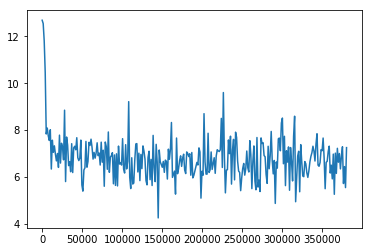

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.interpolate import spline

%matplotlib inline

x = plots[0]
y = plots[1]

x_new = np.linspace(x.min(), x.max(), 300) #300 represents number of points to make between T.min and T.max

y_smooth = spline(x, y, x_new)

plt.plot(x_new, y_smooth)

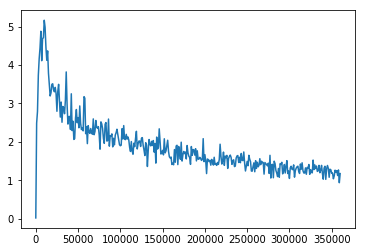

In [3]:
plt.plot(plots[0], plots[3])